# Credit EDA Assignment

## (#)  Import Required Packages 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)


## (#)  Load Columns Description Data

In [3]:
col_des=pd.read_csv('columns_description.csv')
col_des.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   S.no         160 non-null    int64  
 1   Table        160 non-null    object 
 2   Row          160 non-null    object 
 3   Description  160 non-null    object 
 4   Special      69 non-null     object 
 5   Unnamed: 5   0 non-null      float64
dtypes: float64(1), int64(1), object(4)
memory usage: 7.6+ KB


In [4]:
col_des['Table'].value_counts()

application_data            122
previous_application.csv     38
Name: Table, dtype: int64

## (#) Helping Functions

In [5]:
def get_df_col_description(df_name,df):
    cols=list(df.columns)
    col_desc=col_des.copy()
    col_desc=col_desc[(col_desc.Table==df_name)]
    col_desc=col_desc[col_desc.Row.isin(cols)]
    col_desc.reset_index(inplace=True,drop=True)
    # print(col_des)
    for i in range(col_desc.shape[0]):
        v=col_desc.iloc[i,:]
        print(f'{i+1}. {v[3]} : {v[4]} \n\n')
    return None

def remove_cols_with_more_null_values(df,col,size):
    v=df[col].isnull().sum()
    if (v*100)/size>40:
        return True
    else:
        return False
def bar_graph_for_object_type_data_columns(df, datatype):
    for i in list(df.columns):
        if df[i].dtype==datatype:
                a=dict(df[i].value_counts())
                if len(a)<100:
                    print(i,df[i].isnull().sum(),a)
                    df[i].value_counts().plot.bar()
                    plt.show()
def convert_to_catgrcl(df,col_name,split_size,dtype,operation_val,value_in):
    df_data=df[col_name]
    split_data=list(np.linspace(abs(df_data.min()),df_data.max(),split_size,dtype=dtype))
    print(split_data)
    v=''
    cat_data=[]
    for i in range(len(split_data)):
        b=split_data[i]//operation_val
        if i!=0:
            v=v+'-'+str(b)+value_in
            cat_data.append(v)
            v=str(b)+value_in
        else:
            v=str(b)+value_in
        
    return pd.cut(df_data,split_data,labels=cat_data)

# A)APPLICATION_DATA
## a). Load and Understand the Data



In [6]:
app_data=pd.read_csv('application_data.csv')
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
app_datac=app_data.copy()
get_df_col_description('application_data',app_datac)

1. ID of loan in our sample : nan 


2. Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases) : nan 


3. Identification if loan is cash or revolving : nan 


4. Gender of the client : nan 


5. Flag if the client owns a car : nan 


6. Flag if client owns a house or flat : nan 


7. Number of children the client has : nan 


8. Income of the client : nan 


9. Credit amount of the loan : nan 


10. Loan annuity : nan 


11. For consumer loans it is the price of the goods for which the loan is given : nan 


12. Who was accompanying client when he was applying for the loan : nan 


13. Clients income type (businessman, working, maternity leave,…) : nan 


14. Level of highest education the client achieved : nan 


15. Family status of the client : nan 


16. What is the housing situation of the client (renting, living with parents, ...) : nan 


17. Norm

## b). FILTERING THE REQUIRED COLUMNS

#### Removing columns of missing values of more than 40% checked the columns and selected few to check usefull or not by ploting bar graph and if not req appending in removed_columns

In [8]:
removed_columns=[]
size=app_datac.shape[0]
count=0
for i in app_datac.columns:
    nul=remove_cols_with_more_null_values(app_datac,i,size)
    if nul:
        removed_columns.append(i)
        count+=1
        continue
        
    if 'DAYS_LAST_PHONE_CHANGE'==i:
        continue
        
    if 'FLAG_DOCUMENT' in i:
        a=dict(app_datac[i].value_counts())
#         print(a,i)
#         app_datac[i].value_counts().plot.bar()
#         plt.show()
        if a[0]>(a[0]+a[1])/2:
            removed_columns.append(i)
            continue

    if ('MOBI' in i) or ('PHON' in i):
        a=dict(app_datac[i].value_counts())
        print(a,i)
#         app_datac[i].value_counts().plot.bar()
#         plt.show()
        if a[1]!=app_datac.shape[0]:
            removed_columns.append(i)
print(count)

{1: 307510, 0: 1} FLAG_MOBIL
{1: 252125, 0: 55386} FLAG_EMP_PHONE
{0: 246203, 1: 61308} FLAG_WORK_PHONE
{1: 306937, 0: 574} FLAG_CONT_MOBILE
{0: 221080, 1: 86431} FLAG_PHONE
49


#### ON GOING THROUGH DATA THE NOT REQUIRED COLUMNS FOR TASK ARE REMOVED

In [9]:
unwanted_columns=['CNT_CHILDREN','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
              'EMERGENCYSTATE_MODE','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI']
removed_columns.extend(unwanted_columns)

In [10]:
app_datac.drop(columns=list(set(removed_columns)),inplace=True)
app_datac.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,...,2.0,2.0,-1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,...,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,-815.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,...,2.0,0.0,-617.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,-1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0


NAME_CONTRACT_TYPE 0 {'Cash loans': 278232, 'Revolving loans': 29279}


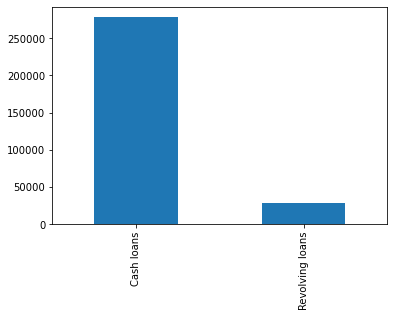

CODE_GENDER 0 {'F': 202448, 'M': 105059, 'XNA': 4}


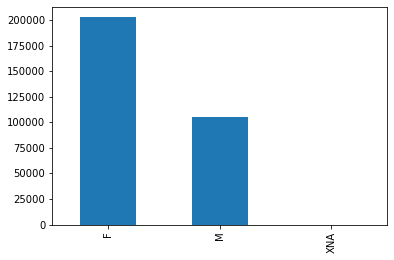

FLAG_OWN_CAR 0 {'N': 202924, 'Y': 104587}


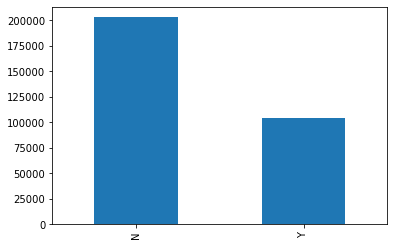

FLAG_OWN_REALTY 0 {'Y': 213312, 'N': 94199}


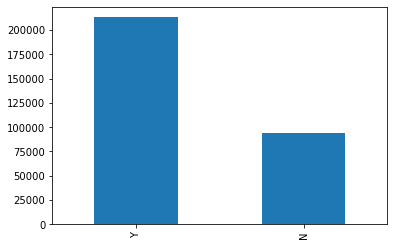

NAME_TYPE_SUITE 1292 {'Unaccompanied': 248526, 'Family': 40149, 'Spouse, partner': 11370, 'Children': 3267, 'Other_B': 1770, 'Other_A': 866, 'Group of people': 271}


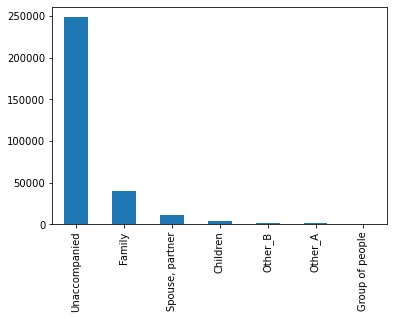

NAME_INCOME_TYPE 0 {'Working': 158774, 'Commercial associate': 71617, 'Pensioner': 55362, 'State servant': 21703, 'Unemployed': 22, 'Student': 18, 'Businessman': 10, 'Maternity leave': 5}


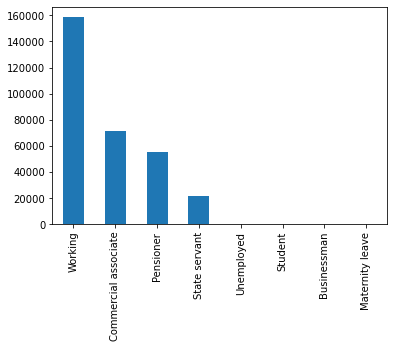

NAME_EDUCATION_TYPE 0 {'Secondary / secondary special': 218391, 'Higher education': 74863, 'Incomplete higher': 10277, 'Lower secondary': 3816, 'Academic degree': 164}


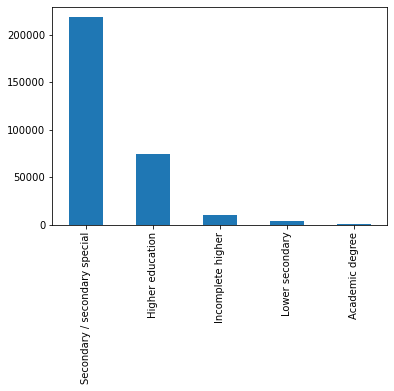

NAME_FAMILY_STATUS 0 {'Married': 196432, 'Single / not married': 45444, 'Civil marriage': 29775, 'Separated': 19770, 'Widow': 16088, 'Unknown': 2}


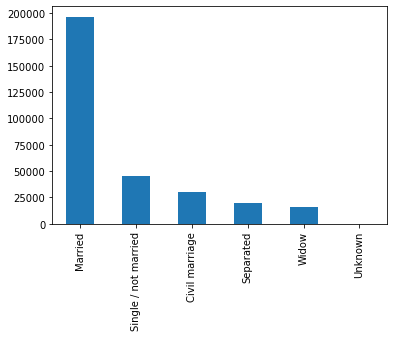

NAME_HOUSING_TYPE 0 {'House / apartment': 272868, 'With parents': 14840, 'Municipal apartment': 11183, 'Rented apartment': 4881, 'Office apartment': 2617, 'Co-op apartment': 1122}


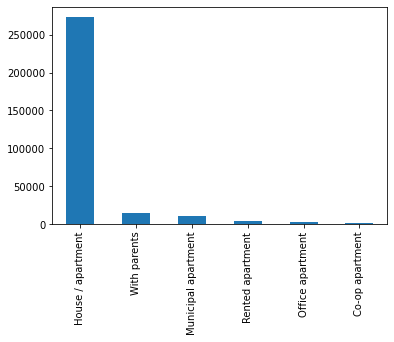

OCCUPATION_TYPE 96391 {'Laborers': 55186, 'Sales staff': 32102, 'Core staff': 27570, 'Managers': 21371, 'Drivers': 18603, 'High skill tech staff': 11380, 'Accountants': 9813, 'Medicine staff': 8537, 'Security staff': 6721, 'Cooking staff': 5946, 'Cleaning staff': 4653, 'Private service staff': 2652, 'Low-skill Laborers': 2093, 'Waiters/barmen staff': 1348, 'Secretaries': 1305, 'Realty agents': 751, 'HR staff': 563, 'IT staff': 526}


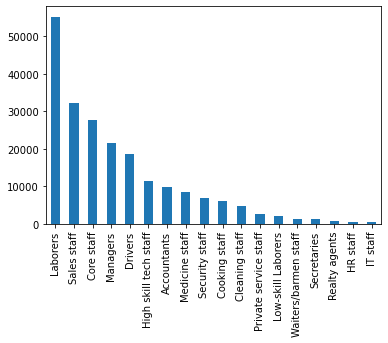

WEEKDAY_APPR_PROCESS_START 0 {'TUESDAY': 53901, 'WEDNESDAY': 51934, 'MONDAY': 50714, 'THURSDAY': 50591, 'FRIDAY': 50338, 'SATURDAY': 33852, 'SUNDAY': 16181}


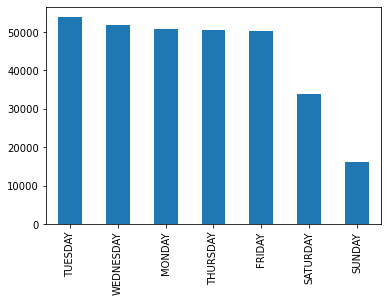

ORGANIZATION_TYPE 0 {'Business Entity Type 3': 67992, 'XNA': 55374, 'Self-employed': 38412, 'Other': 16683, 'Medicine': 11193, 'Business Entity Type 2': 10553, 'Government': 10404, 'School': 8893, 'Trade: type 7': 7831, 'Kindergarten': 6880, 'Construction': 6721, 'Business Entity Type 1': 5984, 'Transport: type 4': 5398, 'Trade: type 3': 3492, 'Industry: type 9': 3368, 'Industry: type 3': 3278, 'Security': 3247, 'Housing': 2958, 'Industry: type 11': 2704, 'Military': 2634, 'Bank': 2507, 'Agriculture': 2454, 'Police': 2341, 'Transport: type 2': 2204, 'Postal': 2157, 'Security Ministries': 1974, 'Trade: type 2': 1900, 'Restaurant': 1811, 'Services': 1575, 'University': 1327, 'Industry: type 7': 1307, 'Transport: type 3': 1187, 'Industry: type 1': 1039, 'Hotel': 966, 'Electricity': 950, 'Industry: type 4': 877, 'Trade: type 6': 631, 'Industry: type 5': 599, 'Insurance': 597, 'Telecom': 577, 'Emergency': 560, 'Industry: type 2': 458, 'Advertising': 429, 'Realtor': 396, 'Culture': 379, 'Ind

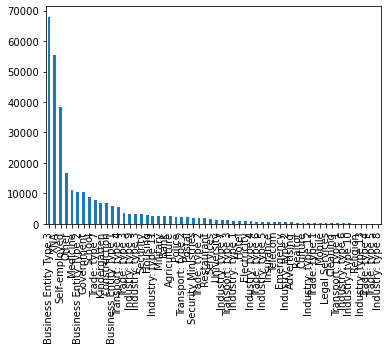

In [11]:
bar_graph_for_object_type_data_columns(app_datac,'object')

In [12]:
get_df_col_description('application_data',app_datac)

1. ID of loan in our sample : nan 


2. Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases) : nan 


3. Identification if loan is cash or revolving : nan 


4. Gender of the client : nan 


5. Flag if the client owns a car : nan 


6. Flag if client owns a house or flat : nan 


7. Income of the client : nan 


8. Credit amount of the loan : nan 


9. Loan annuity : nan 


10. For consumer loans it is the price of the goods for which the loan is given : nan 


11. Who was accompanying client when he was applying for the loan : nan 


12. Clients income type (businessman, working, maternity leave,…) : nan 


13. Level of highest education the client achieved : nan 


14. Family status of the client : nan 


15. What is the housing situation of the client (renting, living with parents, ...) : nan 


16. Normalized population of region where client lives 

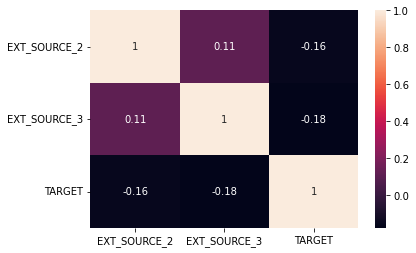

In [13]:
source_cols=['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']
data=app_datac[source_cols].corr()
a=sns.heatmap(data, annot=True)

#### We can clearly see that there is no corelation for ext_source_* and target, so we can remove those cols

In [14]:
source_cols.remove('TARGET')
app_datac.drop(columns=source_cols,inplace=True)

In [15]:
app_datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [16]:
get_df_col_description('application_data',app_datac)

1. ID of loan in our sample : nan 


2. Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases) : nan 


3. Identification if loan is cash or revolving : nan 


4. Gender of the client : nan 


5. Flag if the client owns a car : nan 


6. Flag if client owns a house or flat : nan 


7. Income of the client : nan 


8. Credit amount of the loan : nan 


9. Loan annuity : nan 


10. For consumer loans it is the price of the goods for which the loan is given : nan 


11. Who was accompanying client when he was applying for the loan : nan 


12. Clients income type (businessman, working, maternity leave,…) : nan 


13. Level of highest education the client achieved : nan 


14. Family status of the client : nan 


15. What is the housing situation of the client (renting, living with parents, ...) : nan 


16. Normalized population of region where client lives 

## c). Handling missing values and data imputaion on application_data

In [17]:
app_dataw=app_datac.copy()

In [18]:
size=app_datac.shape[0]
for i in list(app_datac.columns):
    each=app_datac[i]
    n=each.isnull().sum()
    if n>0:
        print(f'(#) {i} -> NaN Count: {n} ({n*100/size}%) ->Dtype: {each.dtype}')
        s=set(each)
        if len(s)>100 and each.dtype=='float64':
            print(each.mean(),each.median(),'\n')
        else:
            print(s,'\n')

(#) AMT_ANNUITY -> NaN Count: 12 (0.0039022994299390914%) ->Dtype: float64
27108.573909183444 24903.0 

(#) AMT_GOODS_PRICE -> NaN Count: 278 (0.09040327012692229%) ->Dtype: float64
538396.2074288895 450000.0 

(#) NAME_TYPE_SUITE -> NaN Count: 1292 (0.42014757195677555%) ->Dtype: object
{nan, 'Spouse, partner', 'Children', 'Unaccompanied', 'Family', 'Other_B', 'Other_A', 'Group of people'} 

(#) OCCUPATION_TYPE -> NaN Count: 96391 (31.345545362604916%) ->Dtype: object
{nan, 'Secretaries', 'Sales staff', 'Laborers', 'IT staff', 'Private service staff', 'Realty agents', 'Security staff', 'Medicine staff', 'Accountants', 'Core staff', 'HR staff', 'Managers', 'Cleaning staff', 'Low-skill Laborers', 'Drivers', 'Cooking staff', 'High skill tech staff', 'Waiters/barmen staff'} 

(#) CNT_FAM_MEMBERS -> NaN Count: 2 (0.000650383238323182%) ->Dtype: float64
{nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, nan, 12.0, 13.0, 14.0, 15.0, 16.0, 11.0, 20.0} 

(#) OBS_30_CNT_SOCIAL_CIRCLE -> N

#### From above output the no of missing cols are less and as amt annuity is based on individual we are removing those values

In [19]:
 app_datac=app_datac[~ app_datac['AMT_ANNUITY'].isnull()]

### Based on then missing values of data in above output for this data:-
#### MEAN for continous values.
#### MEDIAN for count realted values.
#### MODE for categorical values with less null values,
#### 'UNAVAILABLE' for categorical values which are to be considered for analysis.

In [20]:
replace_dict={'mean':['CNT_FAM_MEMBERS'],
              
              'median':['AMT_GOODS_PRICE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                      'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
                      'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 
                      'AMT_REQ_CREDIT_BUREAU_YEAR'],
              
              'mode':['NAME_TYPE_SUITE'],
              
              'notnull':['OCCUPATION_TYPE']}

def data_impuation(df, replace_dict):
    cols_with_values={}
    for i in replace_dict:
        for j in replace_dict[i]:
            if i=='mean':
                m=app_datac[j].mean()    
            elif i=='mode':
                m=app_datac[j].mode()[0]
            elif i=='median':
                m=app_datac[j].median()
            else:
                m='Unavailable'
            cols_with_values[j]=m
    return cols_with_values

dat_imp=data_impuation(app_datac, replace_dict)
app_datac.fillna(value=dat_imp,inplace=True)
app_datac.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_N

## d) Handling Outliers for APPLICATION_DATA

In [21]:
app_datac.DAYS_EMPLOYED=app_datac.DAYS_EMPLOYED.apply(lambda x: abs(x))
app_datac.DAYS_LAST_PHONE_CHANGE=app_datac.DAYS_LAST_PHONE_CHANGE.apply(lambda x: abs(x))
app_datac.DAYS_REGISTRATION=app_datac.DAYS_REGISTRATION.apply(lambda x: abs(x))
app_datac.DAYS_ID_PUBLISH=app_datac.DAYS_ID_PUBLISH.apply(lambda x: abs(x))
app_datac.DAYS_BIRTH=app_datac.DAYS_BIRTH.apply(lambda x: abs(x))


(#) SK_ID_CURR 



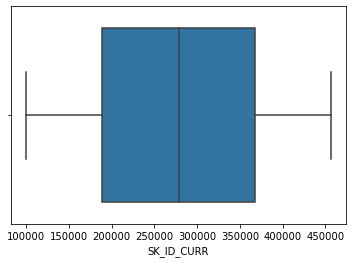

(#) TARGET 



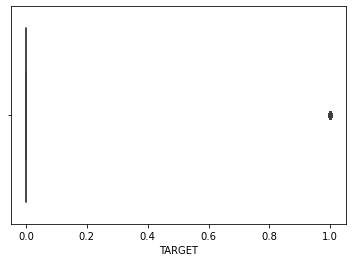

(#) AMT_INCOME_TOTAL 



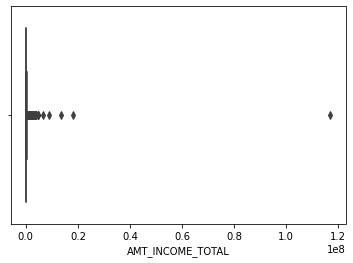

(#) AMT_CREDIT 



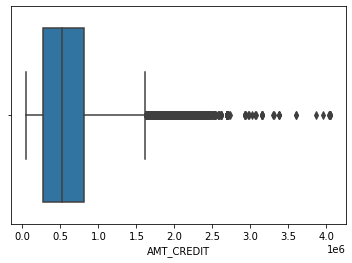

(#) AMT_ANNUITY 



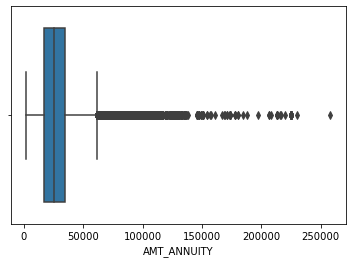

(#) AMT_GOODS_PRICE 



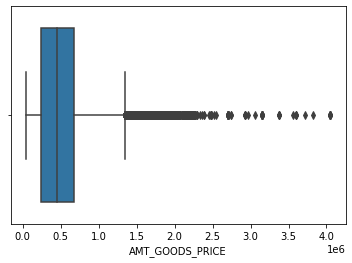

(#) REGION_POPULATION_RELATIVE 



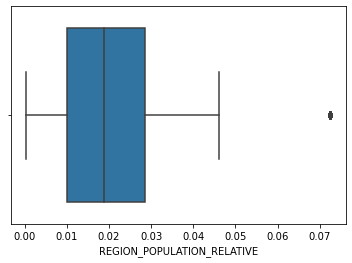

(#) DAYS_BIRTH 



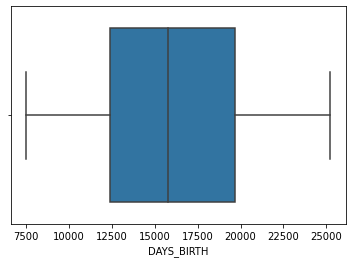

(#) DAYS_EMPLOYED 



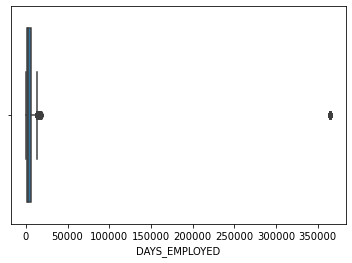

(#) DAYS_REGISTRATION 



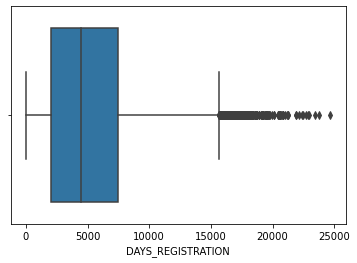

(#) DAYS_ID_PUBLISH 



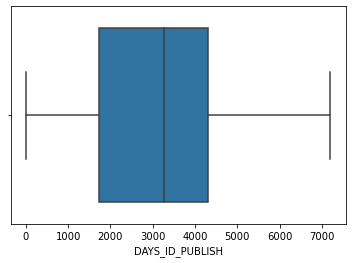

(#) FLAG_EMAIL 



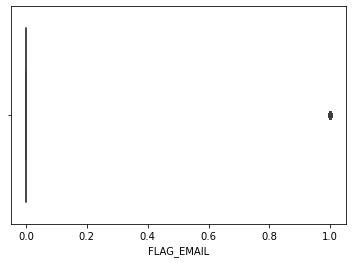

(#) CNT_FAM_MEMBERS 



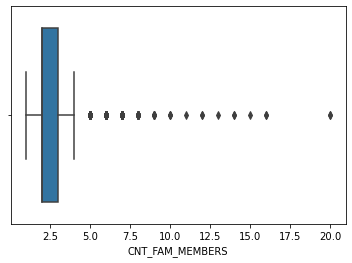

(#) REGION_RATING_CLIENT 



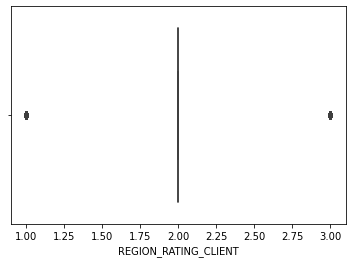

(#) REGION_RATING_CLIENT_W_CITY 



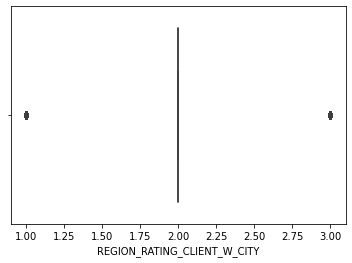

(#) HOUR_APPR_PROCESS_START 



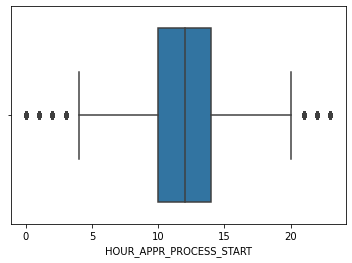

(#) REG_REGION_NOT_LIVE_REGION 



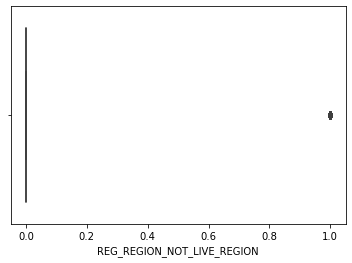

(#) REG_REGION_NOT_WORK_REGION 



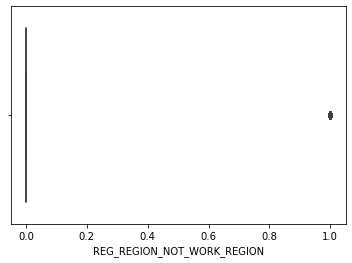

(#) LIVE_REGION_NOT_WORK_REGION 



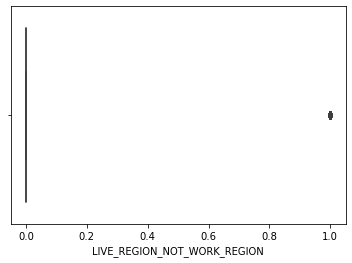

(#) REG_CITY_NOT_LIVE_CITY 



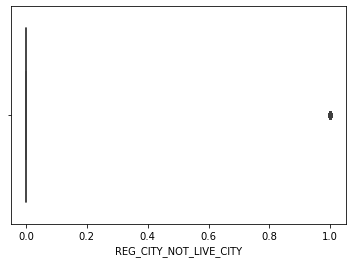

(#) REG_CITY_NOT_WORK_CITY 



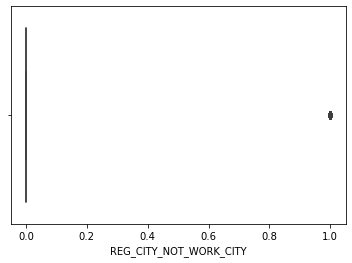

(#) LIVE_CITY_NOT_WORK_CITY 



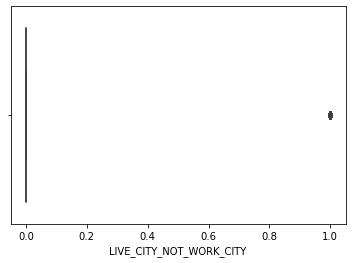

(#) OBS_30_CNT_SOCIAL_CIRCLE 



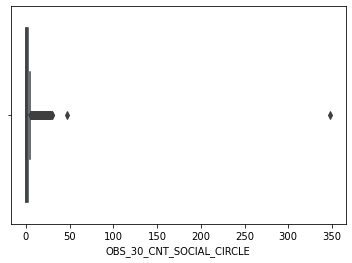

(#) DEF_30_CNT_SOCIAL_CIRCLE 



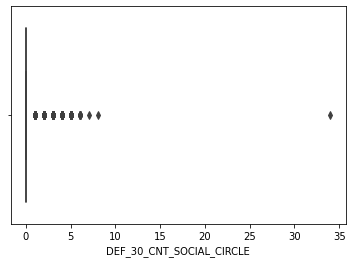

(#) OBS_60_CNT_SOCIAL_CIRCLE 



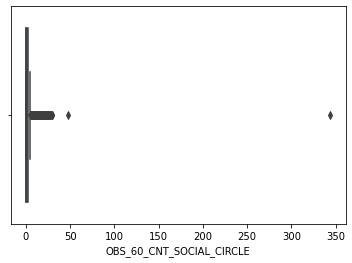

(#) DEF_60_CNT_SOCIAL_CIRCLE 



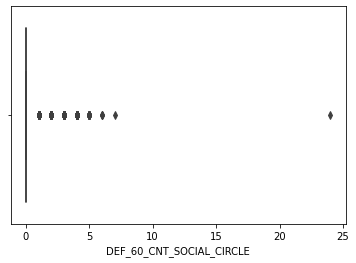

(#) DAYS_LAST_PHONE_CHANGE 



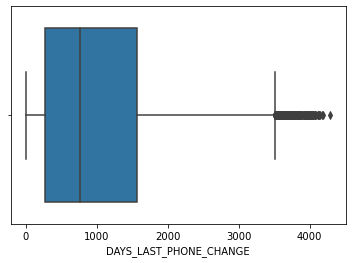

(#) FLAG_DOCUMENT_3 



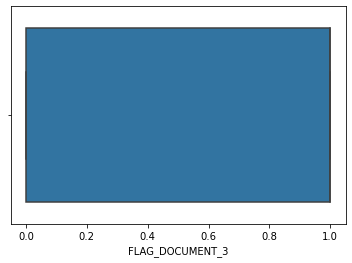

(#) AMT_REQ_CREDIT_BUREAU_HOUR 



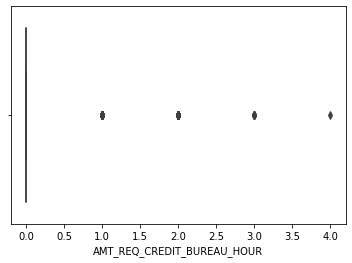

(#) AMT_REQ_CREDIT_BUREAU_DAY 



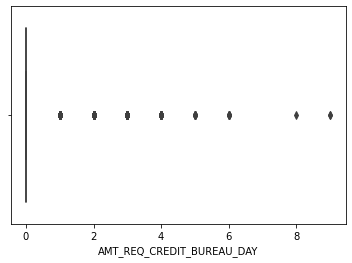

(#) AMT_REQ_CREDIT_BUREAU_WEEK 



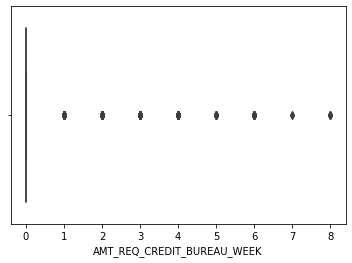

(#) AMT_REQ_CREDIT_BUREAU_MON 



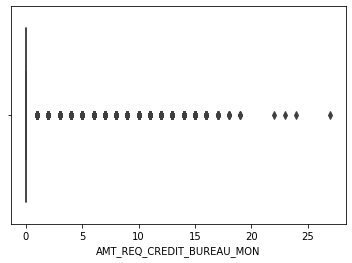

(#) AMT_REQ_CREDIT_BUREAU_QRT 



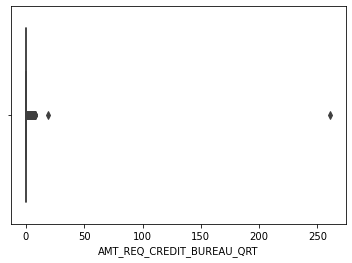

(#) AMT_REQ_CREDIT_BUREAU_YEAR 



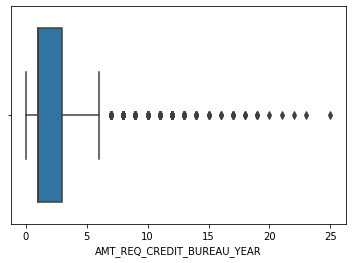

In [22]:
app_datad=app_datac.copy()
for i in list(app_datad.columns):
    each=app_datad[i]
    if each.dtype in ['float64', 'int64']:
        print('(#)',i,'\n')
        sns.boxplot(each)
        plt.show()

#### Based on the above plots we can modify the dic dictionary with some required columns with values which are to be removed as outliers.

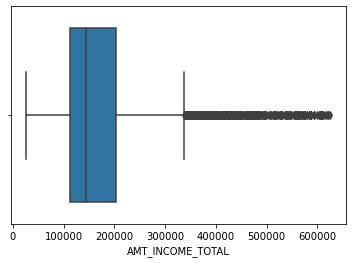

In [23]:
#AMT_INCOME_TOTAL the outlier is the one which was largest amt with small occurance, so 0.995 quantile
#best for having better continous values
app_datad=app_datad[app_datad.AMT_INCOME_TOTAL<app_datad.AMT_INCOME_TOTAL.quantile(0.995)]
sns.boxplot(app_datad.AMT_INCOME_TOTAL)
plt.show()

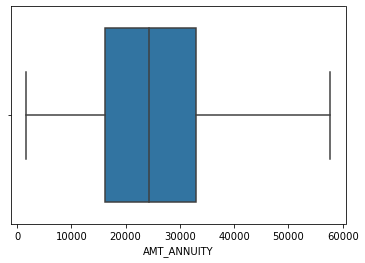

In [24]:
app_datad=app_datad[app_datad.AMT_ANNUITY<app_datad.AMT_ANNUITY.quantile(0.97)]
sns.boxplot(app_datad['AMT_ANNUITY'])
plt.show()

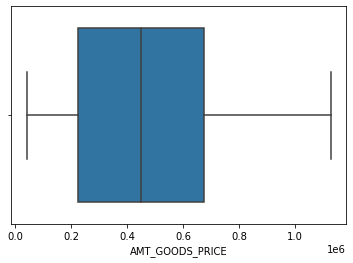

In [25]:
app_datad=app_datad[app_datad.AMT_GOODS_PRICE<app_datad.AMT_GOODS_PRICE.quantile(0.95)]
sns.boxplot(app_datad.AMT_GOODS_PRICE)
plt.show()

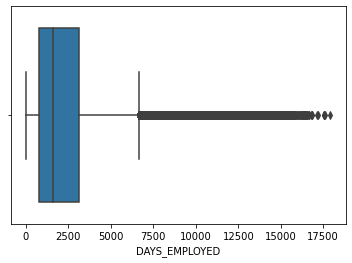

In [26]:
app_datad=app_datad[app_datad.DAYS_EMPLOYED<app_datad.DAYS_EMPLOYED.quantile(1)]
sns.boxplot(app_datad.DAYS_EMPLOYED)
plt.show()

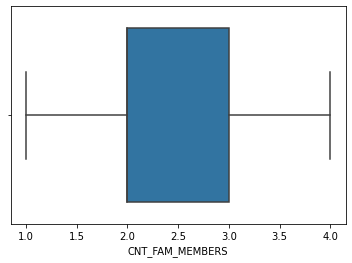

In [27]:
# CNT_FAM_MEMBERS 
app_datad=app_datad[app_datad.CNT_FAM_MEMBERS<app_datad.CNT_FAM_MEMBERS.quantile(0.99)]
sns.boxplot(app_datad.CNT_FAM_MEMBERS)
plt.show()

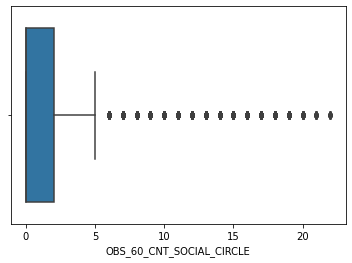

In [28]:
# OBS_30_CNT_SOCIAL_CIRCLE 
app_datad=app_datad[app_datad.OBS_60_CNT_SOCIAL_CIRCLE<app_datad.OBS_60_CNT_SOCIAL_CIRCLE.quantile(0.9999)]
sns.boxplot(app_datad.OBS_60_CNT_SOCIAL_CIRCLE)
plt.show()

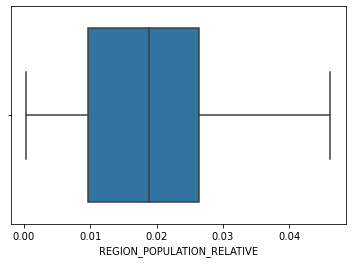

In [29]:
app_datad=app_datad[app_datad.REGION_POPULATION_RELATIVE<=app_datad.REGION_POPULATION_RELATIVE.quantile(0.975)]
sns.boxplot(app_datad.REGION_POPULATION_RELATIVE)
plt.show()

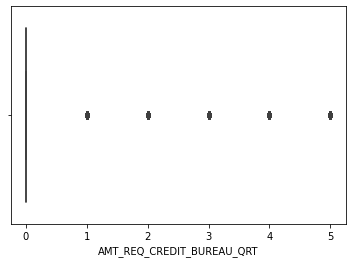

In [30]:
app_datad=app_datad[app_datad.AMT_REQ_CREDIT_BUREAU_QRT<app_datad.AMT_REQ_CREDIT_BUREAU_QRT.quantile(0.9999)]
sns.boxplot(app_datad.AMT_REQ_CREDIT_BUREAU_QRT)
plt.show()

In [31]:
# app_datad.info()

In [32]:
# for i in list(app_datad.columns):
#     each=app_datad[i]
#     if each.dtype =='object':
#         c=each.value_counts()
#         print('(#)',i,'\n')
#         print(dict(c),'\n')
#         c.plot.bar()
#         plt.show()

In [33]:
### From above plots we can see XNA is not needed in CODE_GENDER with 4, 
### NAME_FAMILY_STATUS  with unknown can be removed as it is of 104 val
### NAME_INCOME_TYPE with Maternity leave:3, Businessman:4, Pensioner:10, Student: 104

app_datad=app_datad[app_datad.CODE_GENDER!='XNA']

app_datad=app_datad[app_datad.NAME_FAMILY_STATUS!='Unknown']

app_datad=app_datad[~(app_datad.NAME_INCOME_TYPE.isin(['Maternity leave','Businessman','Pensioner','Student']))]

In [34]:
app_datad.reset_index(inplace=True,drop=True)

In [35]:
app_datad.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,...,2.0,2.0,1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,815.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,...,2.0,0.0,617.0,1,0.0,0.0,0.0,0.0,0.0,1.0
3,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100008,0,Cash loans,M,N,Y,99000.0,490495.5,27517.5,454500.0,...,0.0,0.0,2536.0,1,0.0,0.0,0.0,0.0,1.0,1.0


In [36]:
app_datad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220859 entries, 0 to 220858
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   220859 non-null  int64  
 1   TARGET                       220859 non-null  int64  
 2   NAME_CONTRACT_TYPE           220859 non-null  object 
 3   CODE_GENDER                  220859 non-null  object 
 4   FLAG_OWN_CAR                 220859 non-null  object 
 5   FLAG_OWN_REALTY              220859 non-null  object 
 6   AMT_INCOME_TOTAL             220859 non-null  float64
 7   AMT_CREDIT                   220859 non-null  float64
 8   AMT_ANNUITY                  220859 non-null  float64
 9   AMT_GOODS_PRICE              220859 non-null  float64
 10  NAME_TYPE_SUITE              220859 non-null  object 
 11  NAME_INCOME_TYPE             220859 non-null  object 
 12  NAME_EDUCATION_TYPE          220859 non-null  object 
 13 

## e) Data Convertion (num-catgrcl or catgrcl-num to make analysis easier)

In [37]:
app_datae=app_datad.copy() #copy to reduce execution of total code if any wrng happens

In [38]:
for i in list(app_datae.columns):
    each=app_datae[i]
    if each.dtype!='object':
        print('(#)',i)
        print(each.describe())
        print('\n\n')

(#) SK_ID_CURR
count    220859.000000
mean     278250.117297
std      102860.228354
min      100002.000000
25%      189030.500000
50%      278227.000000
75%      367224.000000
max      456255.000000
Name: SK_ID_CURR, dtype: float64



(#) TARGET
count    220859.000000
mean          0.091140
std           0.287808
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64



(#) AMT_INCOME_TOTAL
count    220859.000000
mean     162083.281056
std       74874.390917
min       25650.000000
25%      112500.000000
50%      144000.000000
75%      202500.000000
max      625500.000000
Name: AMT_INCOME_TOTAL, dtype: float64



(#) AMT_CREDIT
count    2.208590e+05
mean     5.296997e+05
std      3.063496e+05
min      4.500000e+04
25%      2.700000e+05
50%      4.811760e+05
75%      7.547400e+05
max      1.436850e+06
Name: AMT_CREDIT, dtype: float64



(#) AMT_ANNUITY
count    220859.000000
mean      25074.364570
st

In [39]:
app_datae.AMT_INCOME_TOTAL=convert_to_catgrcl(app_datae,'AMT_INCOME_TOTAL',12,'int64',1000,'k')
app_datae.AMT_INCOME_TOTAL.value_counts()

[25650, 80181, 134713, 189245, 243777, 298309, 352840, 407372, 461904, 516436, 570968, 625500]


134k-189k    80625
80k-134k     64467
189k-243k    32458
25k-80k      15994
243k-298k    15184
298k-352k     5621
352k-407k     4137
407k-461k     1665
516k-570k      408
461k-516k      191
570k-625k      108
Name: AMT_INCOME_TOTAL, dtype: int64

In [40]:
app_datae.AMT_CREDIT=convert_to_catgrcl(app_datae,'AMT_CREDIT',14,'int64',1000,'k')
app_datae.AMT_CREDIT.value_counts()

[45000, 152065, 259130, 366196, 473261, 580326, 687392, 794457, 901523, 1008588, 1115653, 1222719, 1329784, 1436850]


259k-366k      36410
152k-259k      35821
473k-580k      28651
366k-473k      23719
580k-687k      21946
794k-901k      17689
687k-794k      14140
45k-152k       13032
1008k-1115k     9775
901k-1008k      8531
1222k-1329k     5355
1115k-1222k     5195
1329k-1436k      428
Name: AMT_CREDIT, dtype: int64

In [41]:
app_datae.AMT_ANNUITY=convert_to_catgrcl(app_datae,'AMT_ANNUITY',14,'int64',1000,'k')
app_datae.AMT_ANNUITY.value_counts()

[1980, 6266, 10552, 14838, 19124, 23410, 27696, 31982, 36268, 40554, 44840, 49126, 53412, 57699]


23k-27k    34364
19k-23k    30866
27k-31k    26643
14k-19k    26597
10k-14k    25939
6k-10k     18925
31k-36k    18854
36k-40k    14974
40k-44k     7836
44k-49k     6532
49k-53k     4338
53k-57k     2970
1k-6k       2020
Name: AMT_ANNUITY, dtype: int64

In [42]:
temp=app_datae.REGION_POPULATION_RELATIVE
temp=temp.apply(lambda x: round(x*100,2))
split_data=list(map(lambda x: round(x,2),np.linspace(temp.min(),temp.max(),11,dtype='float64')))
cat_data=['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%']
app_datae.REGION_POPULATION_RELATIVE=pd.cut(temp,split_data,labels=cat_data)

In [43]:
app_datae.CNT_FAM_MEMBERS=app_datae.CNT_FAM_MEMBERS.astype('int64')
app_datae.REGION_RATING_CLIENT_W_CITY=app_datae.REGION_RATING_CLIENT_W_CITY.astype('int64')

In [44]:
app_datae.AMT_GOODS_PRICE=convert_to_catgrcl(app_datae,'AMT_GOODS_PRICE',14,'int64',1000,'k')
app_datae.AMT_GOODS_PRICE.value_counts()

[40500, 124125, 207750, 291375, 375000, 458626, 542251, 625876, 709501, 793127, 876752, 960377, 1044002, 1127628]


207k-291k      43261
375k-458k      36372
625k-709k      29217
124k-207k      25511
876k-960k      17715
291k-375k      16541
458k-542k      16280
40k-124k        9090
1044k-1127k     8618
542k-625k       6189
709k-793k       5415
793k-876k       4242
960k-1044k      2407
Name: AMT_GOODS_PRICE, dtype: int64

In [45]:
# DAYS_EMPLOYED
app_datae.DAYS_EMPLOYED=convert_to_catgrcl(app_datae,'DAYS_EMPLOYED',24,'int64',30,'m')
app_datae.DAYS_EMPLOYED.value_counts()

[0, 778, 1557, 2336, 3115, 3893, 4672, 5451, 6230, 7009, 7787, 8566, 9345, 10124, 10902, 11681, 12460, 13239, 14018, 14796, 15575, 16354, 17133, 17912]


0m-25m       57206
25m-51m      50175
51m-77m      33528
77m-103m     24536
103m-129m    16332
129m-155m    10577
155m-181m     8225
181m-207m     4657
207m-233m     3481
233m-259m     3074
259m-285m     2340
285m-311m     1702
311m-337m     1279
337m-363m     1091
363m-389m      836
389m-415m      646
415m-441m      539
441m-467m      277
467m-493m      182
493m-519m       99
519m-545m       49
545m-571m       19
571m-597m        7
Name: DAYS_EMPLOYED, dtype: int64

In [46]:
# DAYS_BIRTH
app_datae.DAYS_BIRTH=convert_to_catgrcl(app_datae,'DAYS_BIRTH',6,'int64',30*12,'y')
app_datae.DAYS_BIRTH.value_counts()

[7489, 11031, 14573, 18115, 21657, 25200]


30y-40y    68800
40y-50y    63163
20y-30y    42976
50y-60y    39501
60y-70y     6418
Name: DAYS_BIRTH, dtype: int64

In [47]:
# DAYS_LAST_PHONE_CHANGE
app_datae.DAYS_LAST_PHONE_CHANGE=convert_to_catgrcl(app_datae,'DAYS_LAST_PHONE_CHANGE',24,'int64',30,'m')
app_datae.DAYS_LAST_PHONE_CHANGE.value_counts()

[0, 186, 373, 559, 746, 933, 1119, 1306, 1492, 1679, 1866, 2052, 2239, 2425, 2612, 2799, 2985, 3172, 3358, 3545, 3732, 3918, 4105, 4292]


12m-18m      22918
6m-12m       21477
18m-24m      20292
0m-6m        19036
24m-31m      15232
49m-55m      14375
55m-62m      12861
31m-37m      12479
43m-49m      10975
37m-43m      10947
62m-68m       8771
68m-74m       6249
74m-80m       5647
80m-87m       5163
87m-93m       3141
93m-99m       2014
99m-105m      1457
105m-111m     1146
111m-118m      451
118m-124m      135
124m-130m       54
130m-136m       19
136m-143m        4
Name: DAYS_LAST_PHONE_CHANGE, dtype: int64

In [48]:
# DAYS_ID_PUBLISH
app_datae.DAYS_ID_PUBLISH=convert_to_catgrcl(app_datae,'DAYS_ID_PUBLISH',24,'int64',30,'m')
app_datae.DAYS_ID_PUBLISH.value_counts()

[0, 312, 625, 938, 1251, 1564, 1877, 2190, 2503, 2816, 3129, 3442, 3754, 4067, 4380, 4693, 5006, 5319, 5632, 5945, 6258, 6571, 6884, 7197]


135m-146m    22171
146m-156m    19805
125m-135m    14257
83m-93m      13335
93m-104m     12695
73m-83m      12687
31m-41m      12634
104m-114m    12455
156m-166m    12183
20m-31m      12100
52m-62m      12022
62m-73m      12000
41m-52m      11857
10m-20m      11490
114m-125m    10713
0m-10m       10525
166m-177m     5059
177m-187m     1709
187m-198m      733
198m-208m      413
208m-219m        4
229m-239m        1
219m-229m        0
Name: DAYS_ID_PUBLISH, dtype: int64

In [49]:
flags=['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
      'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_3','TARGET']
for i in flags:
    if i=='TARGET':
        app_datae[i]=app_datae[i].apply(lambda x: 'Danger' if int(x)==1 else 'Safe')
    else:
        app_datae[i]=app_datae[i].apply(lambda x: 'True' if int(x)==1 else 'False')

In [50]:
app_dataa=app_datae.copy()
app_datae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220859 entries, 0 to 220858
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   220859 non-null  int64   
 1   TARGET                       220859 non-null  object  
 2   NAME_CONTRACT_TYPE           220859 non-null  object  
 3   CODE_GENDER                  220859 non-null  object  
 4   FLAG_OWN_CAR                 220859 non-null  object  
 5   FLAG_OWN_REALTY              220859 non-null  object  
 6   AMT_INCOME_TOTAL             220858 non-null  category
 7   AMT_CREDIT                   220692 non-null  category
 8   AMT_ANNUITY                  220858 non-null  category
 9   AMT_GOODS_PRICE              220858 non-null  category
 10  NAME_TYPE_SUITE              220859 non-null  object  
 11  NAME_INCOME_TYPE             220859 non-null  object  
 12  NAME_EDUCATION_TYPE          220859 non-null

# B). PREVIOUS_APPLICATION 
## a). Load and Understand the data

In [51]:
prev_app=pd.read_csv('previous_application.csv')
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
prev_appc=prev_app.copy()
prev_appc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## b). FILTERING THE REQUIRED COLUMNS 

In [53]:
#remove cols with missing values greater than 40%
size=prev_appc.shape[0]
remove_cols=[]
for i in list(prev_appc.columns):
    nul=remove_cols_with_more_null_values(prev_appc,i,size)
    if nul:
        remove_cols.append(i)
        continue
prev_appc.drop(columns=list(set(remove_cols)),inplace=True)
print(prev_appc.shape[1])
get_df_col_description('previous_application.csv',prev_appc)

26
1. ID of loan in our sample : hashed 


2. Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application : nan 


3. Annuity of previous application : nan 


4. For how much credit did client ask on the previous application : nan 


5. Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT : nan 


6. Goods price of good that client asked for (if applicable) on the previous application : nan 


7. On which day of the week did the client apply for previous application : nan 


8. Approximately at what day hour did the client apply for the previous application : rounded 


9. Flag if it was last application for the previous contract. Sometimes by mistake of client or our clerk there could be more applications for one single contract : nan 


10. Flag if the 

In [54]:
# bar_graph_for_object_type_data_columns(prev_appc, 'object')

In [55]:
# By Going through the plots we can see that 
# 1. WEEKDAY_APPR_PROCESS_START are almost equally balance and no much difference and also it is weekday which is not usefull
# 2. Flag_LAST_APPL_PER_CONTRACT has values majority with YES where No is negligible, so we this is not usefull

remove_col=['WEEKDAY_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT' ]

In [56]:
# bar_graph_for_object_type_data_columns(prev_appc, 'int64')

In [57]:
# As there is no need of the what time did user applied for loan we can neglect tim realted data
remove_col.extend(['HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY'])

In [58]:
prev_appc.drop(columns=list(set(remove_col)),inplace=True)

In [59]:
# get_df_col_description('previous_application.csv',prev_appc)

## c). Handling missing values and data imputaion

In [60]:
# prev_appc.info()

In [61]:
prev_appc.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY               372235
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_GOODS_PRICE           385515
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT               372230
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION          346
dtype: int64

In [62]:
misng_col=['AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE','CNT_PAYMENT']
# for i in misng_col:
#     prev_appc[i]=prev_appc[i].apply(lambda x: round(x,2))
#     sns.boxplot(prev_appc[i])
#     plt.show()

In [63]:
#Based On the barplots we can see that many of values are far except for cnt_payment(median)
for i in misng_col:
    each=prev_appc[i]
    if i=='CNT_PAYMENT':
        prev_appc[i].fillna(each.median(),inplace=True)
        continue
    each.fillna(each.mean(),inplace=True)
    

In [64]:
# As product_combination a categorical value we can consider mode
prev_appc['PRODUCT_COMBINATION'].fillna(prev_appc['PRODUCT_COMBINATION'].mode()[0],inplace=True)

# As the only one value missing we can neglect that row
prev_appc=prev_appc[~(prev_appc['AMT_CREDIT'].isnull())]

In [65]:
# prev_appc.isnull().sum()

In [66]:
# prev_appc.info()

## d)Handling Outliers 

In [67]:
prev_appd=prev_appc.copy()

(#) SK_ID_PREV 



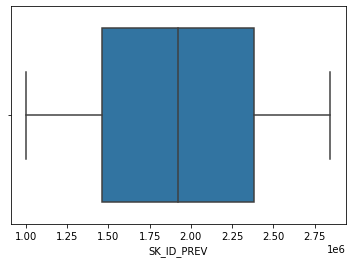

(#) SK_ID_CURR 



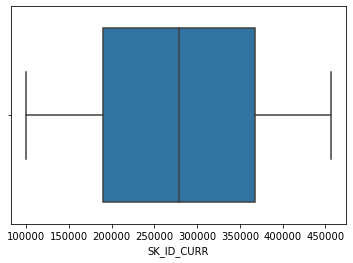

(#) AMT_ANNUITY 



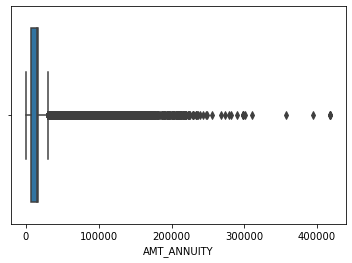

(#) AMT_APPLICATION 



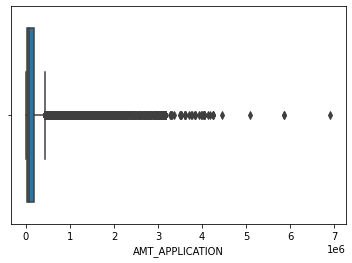

(#) AMT_CREDIT 



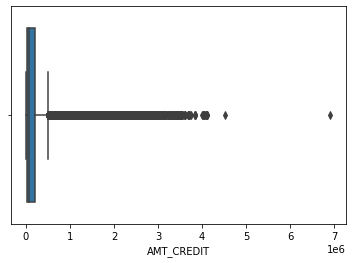

(#) AMT_GOODS_PRICE 



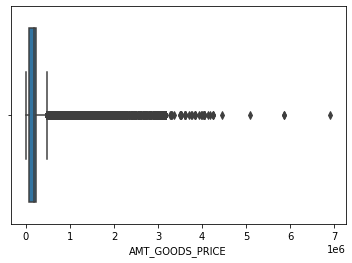

(#) DAYS_DECISION 



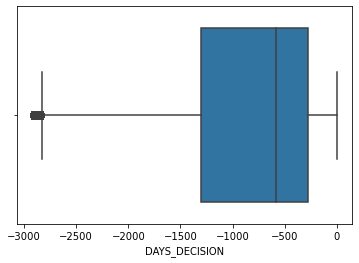

(#) SELLERPLACE_AREA 



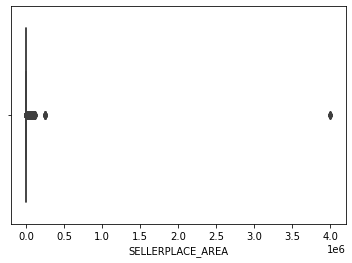

(#) CNT_PAYMENT 



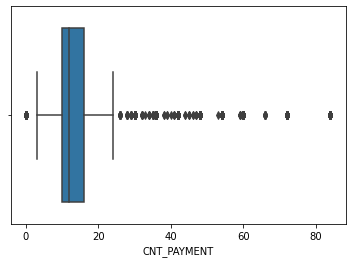

In [68]:
for i in list(prev_appd.columns):
    each=prev_appd[i]
    if each.dtype in ['float64', 'int64']:
        print('(#)',i,'\n')
        sns.boxplot(each)
        plt.show()

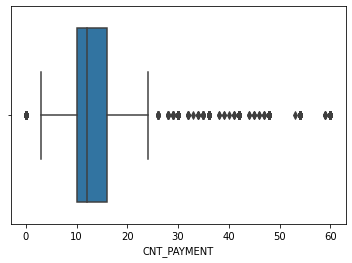

In [69]:
# CNT_PAYMENT with 0.98 was of low outliers compared to prev plot in above
prev_appd=prev_appd[prev_appd.CNT_PAYMENT<=prev_appd.CNT_PAYMENT.quantile(0.98)]
sns.boxplot(prev_appd.CNT_PAYMENT)
plt.show()

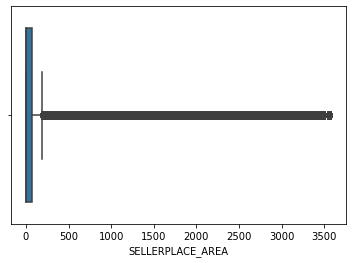

In [70]:
# SELLERPLACE_AREA with 0.99 was of low outliers compared to prev plot in total graphs
prev_appd=prev_appd[prev_appd.SELLERPLACE_AREA<=prev_appd.SELLERPLACE_AREA.quantile(0.99)]
sns.boxplot(prev_appd.SELLERPLACE_AREA)
plt.show()

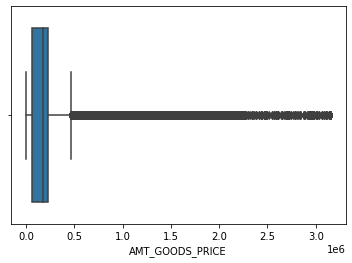

In [71]:
# AMT_GOODS_PRICE with 0.9999 was of low outliers compared to prev plot in total graphs
prev_appd=prev_appd[prev_appd.AMT_GOODS_PRICE<=prev_appd.AMT_GOODS_PRICE.quantile(0.9999)]
sns.boxplot(prev_appd.AMT_GOODS_PRICE)
plt.show()

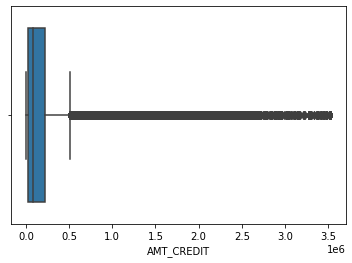

In [72]:
# AMT_CREDIT with 0.9999 was of low outliers compared to prev plot in total graphs
prev_appd=prev_appd[prev_appd.AMT_CREDIT<=prev_appd.AMT_CREDIT.quantile(0.9999)]
sns.boxplot(prev_appd.AMT_CREDIT)
plt.show()

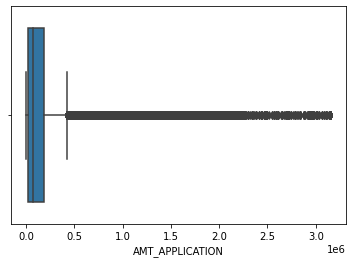

In [73]:
# AMT_APPLICATION with 0.9999 was of low outliers compared to prev plot in total graphs
prev_ap=prev_appd[prev_appd.AMT_APPLICATION<=prev_appd.AMT_APPLICATION.quantile(0.9999)]
sns.boxplot(prev_ap.AMT_APPLICATION)
plt.show()

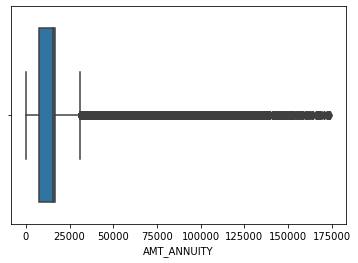

In [74]:
# AMT_ANNUTITY with 0.9999 was of low outliers compared to prev plot in total graphs
prev_appd=prev_appd[prev_appd.AMT_ANNUITY<=prev_appd.AMT_ANNUITY.quantile(0.9999)]
sns.boxplot(prev_appd.AMT_ANNUITY)
plt.show()

(#) NAME_CONTRACT_TYPE 

{'Cash loans': 746949, 'Consumer loans': 713728, 'Revolving loans': 192159, 'XNA': 346}


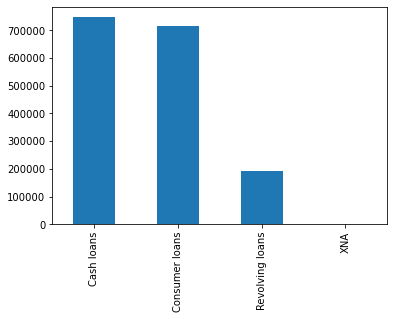

(#) NAME_CASH_LOAN_PURPOSE 

{'XAP': 906233, 'XNA': 677379, 'Repairs': 23736, 'Other': 15601, 'Urgent needs': 8407, 'Buying a used car': 2888, 'Building a house or an annex': 2692, 'Everyday expenses': 2414, 'Medicine': 2173, 'Payments on other loans': 1927, 'Education': 1573, 'Journey': 1238, 'Purchase of electronic equipment': 1060, 'Buying a new car': 1005, 'Wedding / gift / holiday': 961, 'Buying a home': 864, 'Car repairs': 797, 'Furniture': 749, 'Buying a holiday home / land': 531, 'Business development': 424, 'Gasification / water supply': 300, 'Buying a garage': 135, 'Hobby': 55, 'Money for a third person': 25, 'Refusal to name the goal': 15}


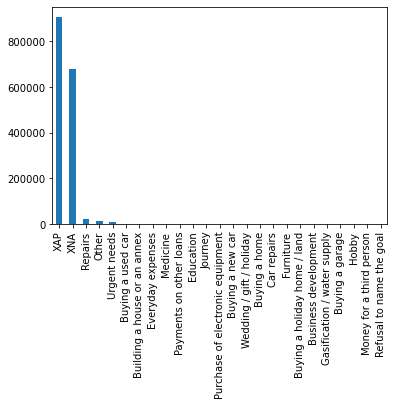

(#) NAME_CONTRACT_STATUS 

{'Approved': 1022356, 'Canceled': 316266, 'Refused': 288293, 'Unused offer': 26267}


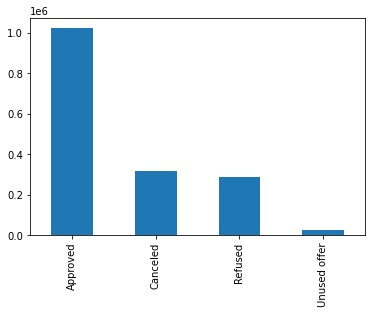

(#) NAME_PAYMENT_TYPE 

{'Cash through the bank': 1018141, 'XNA': 625843, 'Non-cash from your account': 8121, 'Cashless from the account of the employer': 1077}


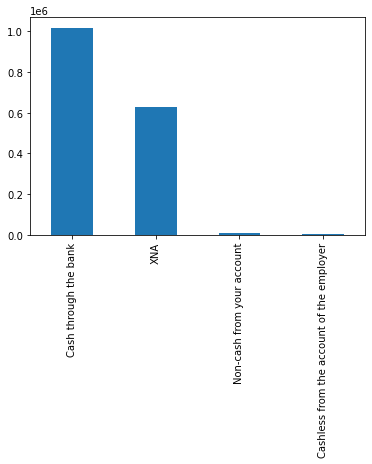

(#) CODE_REJECT_REASON 

{'XAP': 1338615, 'HC': 174465, 'LIMIT': 54828, 'SCO': 36905, 'CLIENT': 26267, 'SCOFR': 12734, 'XNA': 5205, 'VERIF': 3448, 'SYSTEM': 715}


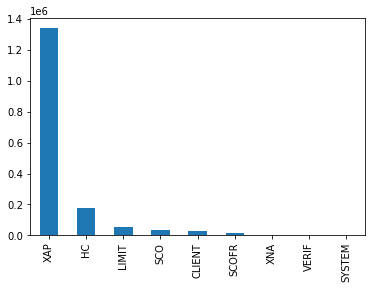

(#) NAME_CLIENT_TYPE 

{'Repeater': 1221867, 'New': 295221, 'Refreshed': 134164, 'XNA': 1930}


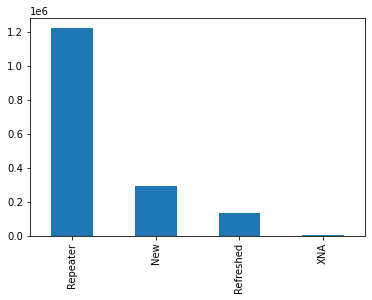

(#) NAME_GOODS_CATEGORY 

{'XNA': 948962, 'Mobile': 223972, 'Consumer Electronics': 117154, 'Computers': 102468, 'Audio/Video': 95374, 'Furniture': 52950, 'Photo / Cinema Equipment': 24337, 'Construction Materials': 24122, 'Clothing and Accessories': 23543, 'Auto Accessories': 7318, 'Jewelry': 6289, 'Homewares': 4868, 'Medical Supplies': 3843, 'Vehicles': 3357, 'Sport and Leisure': 2969, 'Gardening': 2607, 'Other': 2525, 'Office Appliances': 2285, 'Tourism': 1656, 'Medicine': 1550, 'Direct Sales': 446, 'Fitness': 209, 'Additional Service': 128, 'Education': 107, 'Weapon': 77, 'Insurance': 64, 'Animals': 1, 'House Construction': 1}


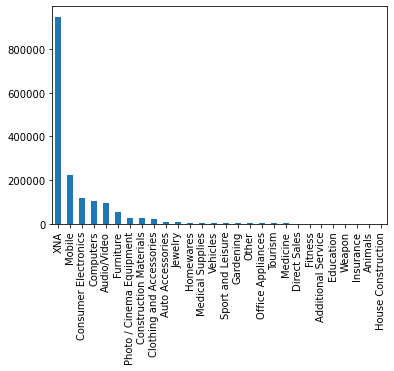

(#) NAME_PORTFOLIO 

{'POS': 676010, 'Cash': 460960, 'XNA': 371950, 'Cards': 143980, 'Cars': 282}


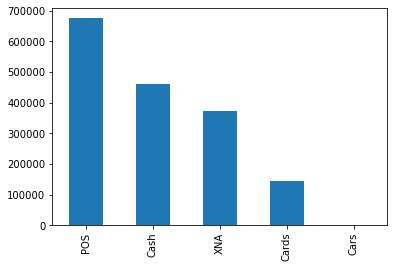

(#) NAME_PRODUCT_TYPE 

{'XNA': 1048242, 'x-sell': 455494, 'walk-in': 149446}


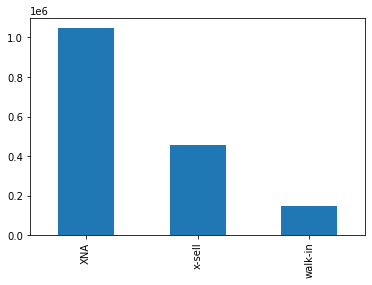

(#) CHANNEL_TYPE 

{'Credit and cash offices': 719740, 'Country-wide': 480376, 'Stone': 210800, 'Regional / Local': 107584, 'Contact center': 71265, 'AP+ (Cash loan)': 56979, 'Channel of corporate sales': 6129, 'Car dealer': 309}


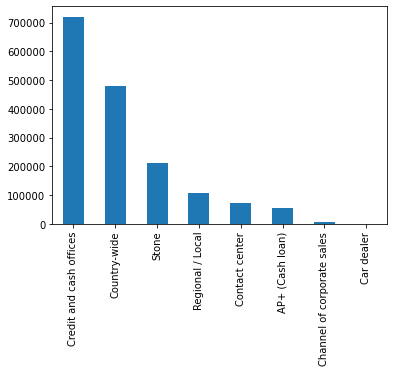

(#) NAME_SELLER_INDUSTRY 

{'XNA': 855368, 'Consumer electronics': 383714, 'Connectivity': 276014, 'Furniture': 57107, 'Construction': 28606, 'Clothing': 23943, 'Industry': 19013, 'Auto technology': 4983, 'Jewelry': 2709, 'MLM partners': 1215, 'Tourism': 510}


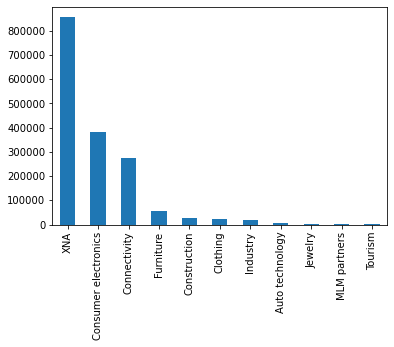

(#) NAME_YIELD_GROUP 

{'XNA': 515930, 'middle': 380126, 'high': 350542, 'low_normal': 318303, 'low_action': 88281}


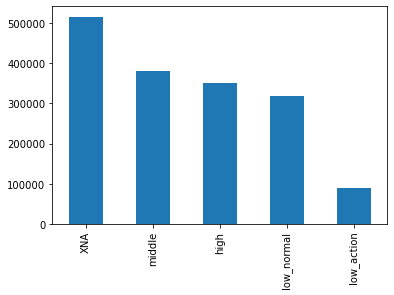

(#) PRODUCT_COMBINATION 

{'Cash': 286335, 'POS household with interest': 254455, 'POS mobile with interest': 220657, 'Cash X-Sell: middle': 143794, 'Cash X-Sell: low': 129975, 'Card Street': 111764, 'POS industry with interest': 97135, 'Card X-Sell': 80395, 'POS household without interest': 78588, 'Cash Street: high': 59618, 'Cash X-Sell: high': 59250, 'Cash Street: middle': 34627, 'Cash Street: low': 33696, 'POS mobile without interest': 24082, 'POS other with interest': 23842, 'POS industry without interest': 12414, 'POS others without interest': 2555}


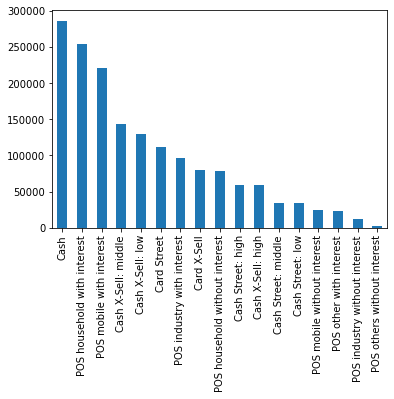

In [75]:
for i in list(prev_appd.columns):
    each=prev_appd[i]
    if each.dtype =='object':
        val=each.value_counts()
        print('(#)',i,'\n')
        print(dict(val))
        val.plot.bar()
        plt.show()

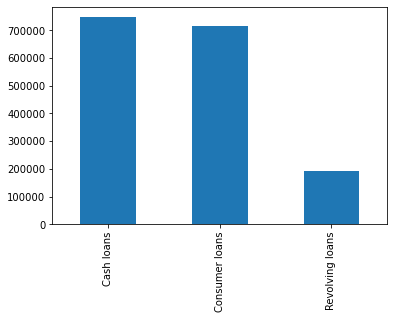

In [76]:
#From Plots we can see That


# NAME_CONTRACT_TYPE has null values 'XNA' which we can drop
prev_appd=prev_appd[prev_appd.NAME_CONTRACT_TYPE!='XNA']
prev_appd.NAME_CONTRACT_TYPE.value_counts().plot.bar()
plt.show()

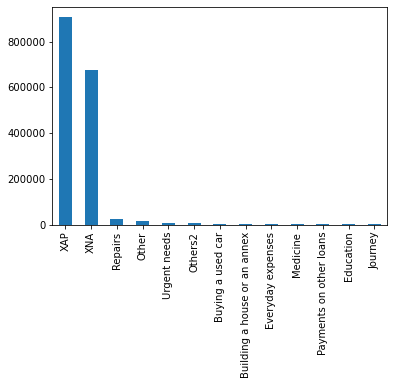

In [77]:
# NAME_CASH_LOAN_PURPOSE has the values which are of very less in number which can be droped or else we can combine those entire
# data as 'others2'.
data=['Purchase of electronic equipment','Buying a new car','Wedding / gift / holiday', 'Buying a home','Car repairs', 'Furniture', 'Buying a holiday home / land','Business development', 'Gasification / water supply','Buying a garage','Hobby', 'Money for a third person', 'Refusal to name the goal']
prev_appd.NAME_CASH_LOAN_PURPOSE=prev_appd.NAME_CASH_LOAN_PURPOSE.apply(lambda x:'Others2' if x in data else x)
prev_appd.NAME_CASH_LOAN_PURPOSE.value_counts().plot.bar()
plt.show()

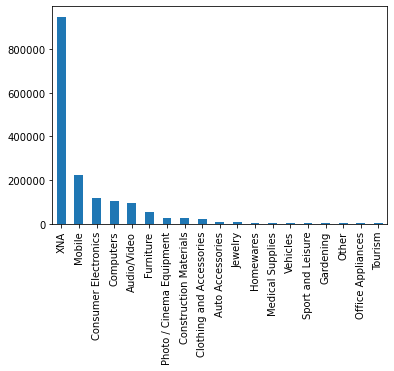

In [78]:
# NAME_GOODS_CATEGORY has the values which are of very less in number which can be droped or else we can combine those entire
# data as 'others2'.
data=['Direct Sales', 'Fitness', 'Additional Service', 'Education', 'Weapon', 'Insurance', 'Animals', 'House Construction','Medicine']
prev_appd=prev_appd[~(prev_appd.NAME_GOODS_CATEGORY.isin(data))]
prev_appd.NAME_GOODS_CATEGORY.value_counts().plot.bar()
plt.show()

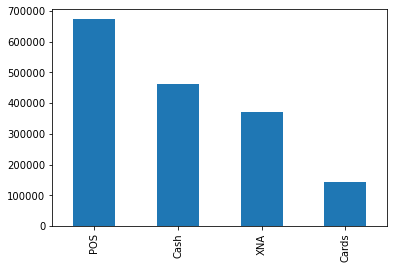

In [79]:
# NAME_PORTFOLIO has less no of occurences which we can drop
prev_appd=prev_appd[prev_appd.NAME_PORTFOLIO!='Cars']
prev_appd.NAME_PORTFOLIO.value_counts().plot.bar()
plt.show()

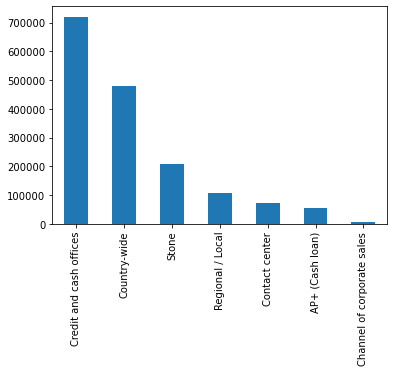

In [80]:
# CHANNEL_TYPE has Car_dealer is less in number which can be droped
prev_appd=prev_appd[prev_appd.CHANNEL_TYPE!='Car dealer']
prev_appd.CHANNEL_TYPE.value_counts().plot.bar()
plt.show()

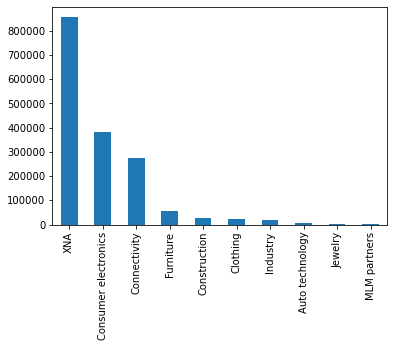

In [81]:
# NAME_SELLER_INDUSTRY  has TOurism with less no of values which we can drop
prev_appd=prev_appd[prev_appd.NAME_SELLER_INDUSTRY!='Tourism']
prev_appd.NAME_SELLER_INDUSTRY.value_counts().plot.bar()
plt.show()

In [82]:
prev_appd.info()
prev_appd.reset_index(inplace=True,drop=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649435 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1649435 non-null  int64  
 1   SK_ID_CURR              1649435 non-null  int64  
 2   NAME_CONTRACT_TYPE      1649435 non-null  object 
 3   AMT_ANNUITY             1649435 non-null  float64
 4   AMT_APPLICATION         1649435 non-null  float64
 5   AMT_CREDIT              1649435 non-null  float64
 6   AMT_GOODS_PRICE         1649435 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1649435 non-null  object 
 8   NAME_CONTRACT_STATUS    1649435 non-null  object 
 9   DAYS_DECISION           1649435 non-null  int64  
 10  NAME_PAYMENT_TYPE       1649435 non-null  object 
 11  CODE_REJECT_REASON      1649435 non-null  object 
 12  NAME_CLIENT_TYPE        1649435 non-null  object 
 13  NAME_GOODS_CATEGORY     1649435 non-null  object 
 14  NA

## e) Data Convertion (num-catgrcl or catgrcl-numerical to make analysis easier)

In [83]:
prev_appe=prev_appd.copy() #copy to reduce execution of total code if any wrng happens


In [84]:
for i in list(prev_appe.columns):
    each=prev_appe[i]
    if each.dtype!='object':
        print('(#)',i)
        print(each.describe())
        print('\n\n')

(#) SK_ID_PREV
count    1.649435e+06
mean     1.923350e+06
std      5.325369e+05
min      1.000001e+06
25%      1.462188e+06
50%      1.923434e+06
75%      2.384442e+06
max      2.845382e+06
Name: SK_ID_PREV, dtype: float64



(#) SK_ID_CURR
count    1.649435e+06
mean     2.783476e+05
std      1.028172e+05
min      1.000010e+05
25%      1.893180e+05
50%      2.787040e+05
75%      3.674970e+05
max      4.562550e+05
Name: SK_ID_CURR, dtype: float64



(#) AMT_ANNUITY
count    1.649435e+06
mean     1.597221e+04
std      1.287337e+04
min      0.000000e+00
25%      7.579260e+03
50%      1.559979e+04
75%      1.685542e+04
max      1.740863e+05
Name: AMT_ANNUITY, dtype: float64



(#) AMT_APPLICATION
count    1.649435e+06
mean     1.750994e+05
std      2.918262e+05
min      0.000000e+00
25%      1.795500e+04
50%      7.015500e+04
75%      1.815975e+05
max      3.150000e+06
Name: AMT_APPLICATION, dtype: float64



(#) AMT_CREDIT
count    1.649435e+06
mean     1.963092e+05
std      3.183924e+05

In [85]:
prev_appe.AMT_GOODS_PRICE=convert_to_catgrcl(prev_appe,'AMT_GOODS_PRICE',20,'int64',100000,'L')
prev_appe.AMT_GOODS_PRICE.value_counts()

[0, 165789, 331578, 497368, 663157, 828947, 994736, 1160526, 1326315, 1492105, 1657894, 1823684, 1989473, 2155263, 2321052, 2486842, 2652631, 2818421, 2984210, 3150000]


0L-1L      804059
1L-3L      591029
3L-4L      101981
6L-8L       41877
8L-9L       25879
4L-6L       25685
9L-11L      19379
13L-14L     12920
11L-13L      8294
16L-18L      3457
14L-16L      2976
21L-23L      2299
19L-21L      1374
18L-19L       559
29L-31L       399
26L-28L       232
23L-24L        95
28L-29L        75
24L-26L        24
Name: AMT_GOODS_PRICE, dtype: int64

In [86]:

prev_appe.AMT_CREDIT=convert_to_catgrcl(prev_appe,'AMT_CREDIT',18,'int64',100000,'L')
prev_appe.AMT_CREDIT.value_counts()

[0, 207307, 414614, 621921, 829228, 1036535, 1243842, 1451149, 1658456, 1865763, 2073070, 2280377, 2487684, 2694991, 2902298, 3109605, 3316912, 3524220]


0L-2L      890047
2L-4L      188546
4L-6L       95785
6L-8L       49353
8L-10L      31859
12L-14L     20290
10L-12L     17917
14L-16L      8368
16L-18L      3508
18L-20L      2683
20L-22L      2582
24L-26L       848
22L-24L       450
33L-35L       240
31L-33L       204
29L-31L       186
26L-29L       178
Name: AMT_CREDIT, dtype: int64

In [87]:
prev_appe.DAYS_DECISION=prev_appe.DAYS_DECISION.apply(lambda x: abs(x))
prev_appe.DAYS_DECISION=convert_to_catgrcl(prev_appe,'DAYS_DECISION',24,'int64',20,'m')
prev_appe.DAYS_DECISION.value_counts()

[1, 128, 255, 382, 509, 636, 763, 890, 1017, 1144, 1271, 1398, 1525, 1652, 1779, 1906, 2033, 2160, 2287, 2414, 2541, 2668, 2795, 2922]


6m-12m       232767
12m-19m      231319
19m-25m      160930
0m-6m        132470
25m-31m      117241
31m-38m      100200
38m-44m       81853
44m-50m       67171
50m-57m       59122
57m-63m       46408
63m-69m       41630
69m-76m       40817
120m-127m     36131
76m-82m       36068
127m-133m     34484
82m-88m       31833
114m-120m     31680
108m-114m     30473
88m-95m       29064
133m-139m     28348
101m-108m     27750
95m-101m      27079
139m-146m     24595
Name: DAYS_DECISION, dtype: int64

In [88]:
prev_appe.SELLERPLACE_AREA=convert_to_catgrcl(prev_appe,'SELLERPLACE_AREA',20,'int64',100,'h')
prev_appe.SELLERPLACE_AREA.value_counts()

[1, 188, 376, 564, 752, 940, 1128, 1315, 1503, 1691, 1879, 2067, 2255, 2442, 2630, 2818, 3006, 3194, 3382, 3570]


0h-1h      553643
1h-3h       61180
3h-5h       28695
9h-11h      25023
13h-15h     21022
5h-7h       15901
18h-20h     14982
20h-22h     13605
11h-13h     13551
7h-9h       12986
16h-18h     11728
15h-16h     11504
22h-24h      8986
24h-26h      6241
28h-30h      5543
31h-33h      4919
33h-35h      4334
26h-28h      3718
30h-31h      3690
Name: SELLERPLACE_AREA, dtype: int64

In [89]:
prev_appa=prev_appe.copy()
prev_appe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649435 entries, 0 to 1649434
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1649435 non-null  int64   
 1   SK_ID_CURR              1649435 non-null  int64   
 2   NAME_CONTRACT_TYPE      1649435 non-null  object  
 3   AMT_ANNUITY             1649435 non-null  float64 
 4   AMT_APPLICATION         1649435 non-null  float64 
 5   AMT_CREDIT              1313044 non-null  category
 6   AMT_GOODS_PRICE         1642593 non-null  category
 7   NAME_CASH_LOAN_PURPOSE  1649435 non-null  object  
 8   NAME_CONTRACT_STATUS    1649435 non-null  object  
 9   DAYS_DECISION           1649433 non-null  category
 10  NAME_PAYMENT_TYPE       1649435 non-null  object  
 11  CODE_REJECT_REASON      1649435 non-null  object  
 12  NAME_CLIENT_TYPE        1649435 non-null  object  
 13  NAME_GOODS_CATEGORY     1649435 non-null  

# C)  Data Analysis
## a) Uni-variate Analysis
### APPLCATION_DATA

In [90]:
app_dataa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220859 entries, 0 to 220858
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   220859 non-null  int64   
 1   TARGET                       220859 non-null  object  
 2   NAME_CONTRACT_TYPE           220859 non-null  object  
 3   CODE_GENDER                  220859 non-null  object  
 4   FLAG_OWN_CAR                 220859 non-null  object  
 5   FLAG_OWN_REALTY              220859 non-null  object  
 6   AMT_INCOME_TOTAL             220858 non-null  category
 7   AMT_CREDIT                   220692 non-null  category
 8   AMT_ANNUITY                  220858 non-null  category
 9   AMT_GOODS_PRICE              220858 non-null  category
 10  NAME_TYPE_SUITE              220859 non-null  object  
 11  NAME_INCOME_TYPE             220859 non-null  object  
 12  NAME_EDUCATION_TYPE          220859 non-null

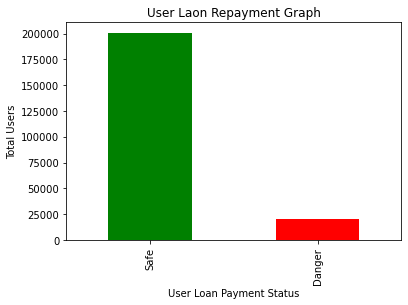

In [91]:
#LETS SEE HOW THE TARGET COLUMN IS WITH DEFAULT AND NON-DEFAULT USERS

app_dataa.TARGET.value_counts().plot.bar(color=['g','r'])
plt.xlabel('User Loan Payment Status')
plt.ylabel('Total Users')
plt.title('User Laon Repayment Graph')
plt.show()

# WE CAN SEE THAT MAJORITY OF USERS ARE REPAYING WELL BUT THE DEFAULT USER COUNT IS NOT NEGLECTABLE.

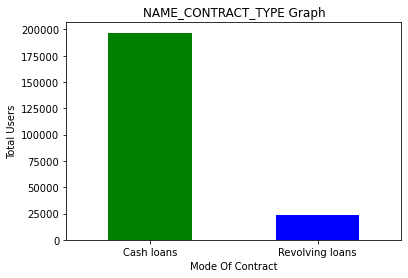

In [92]:
# LETS SEE HOW THE NAME_CONTRACT_TYPE COLUMN IS WITH CashLoans USERS AND RevolvingLoans USERS
col='NAME_CONTRACT_TYPE'
app_dataa[col].value_counts().plot.bar(color=['g','b'])
plt.xlabel('Mode Of Contract')
plt.ylabel('Total Users')
plt.xticks(rotation=0)
plt.title(f'{col} Graph')
plt.show()

# WE CAN SEE THAT MAJORITY OF USERS CHOOSE CASH LOANS LIKE INSTALLMENTS TYPES WHERE ARE REVOLVING LOAN ARE THERE WHICH 
# WE MUST HAVE TO CONSIDER AS THERE IS MORE RISK IN IT FOR DEFAULT.

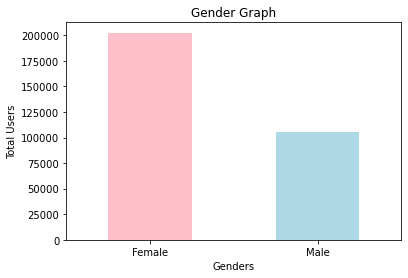

In [93]:
# LETS SEE HOW THE CODE_GENDER COLUMN WITH GENDERS MALE AND FEMALE USERS
col='CODE_GENDER'
data=app_data[col].apply(lambda x: 'Female' if x=='F' else 'Male').value_counts()
data.plot.bar(color=['pink','lightblue'])
plt.xlabel('Genders')
plt.ylabel('Total Users')
plt.xticks(rotation=0)
plt.title(f'Gender Graph')
plt.show()

# BY THE GRAPH WCAN SEE THAT THE MAJORIY OF THE PEOPLE WHO TAKE LOANS ARE FEMALE
# AS WOMEN ARE MAJORLY HOUSE WIFE'S AND ALSO UNEMPLOYEED THERE IS MORE CHANCE OF THEM TO TAKE LOAN.

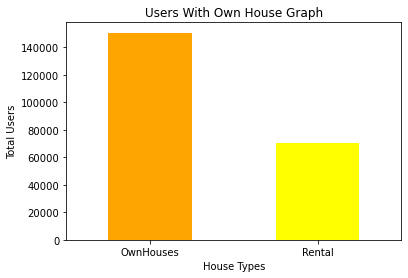

In [94]:
# LETS SEE HOW THE FLAG_OWN_REALTY COLUMN WITH OwnHosed AND Rental USERS
col='FLAG_OWN_REALTY'
data=app_dataa[col].apply(lambda x: 'OwnHouses' if x=='Y' else 'Rental').value_counts()
data.plot.bar(color=['orange','yellow'])
plt.xticks(rotation=0)
plt.xlabel('House Types')
plt.ylabel('Total Users')
plt.title(f'Users With Own House Graph')
plt.show()

# BY THE GRAPH We CAN SEE THAT THE MAJORIY OF THE PEOPLE WHO TAKE LOANS ARE OF OWNHOUSES WHERE RENTAL HOUSE USERS ARE
# MORE WHEN COMPARED TO PREVIOUS GRAPHS.

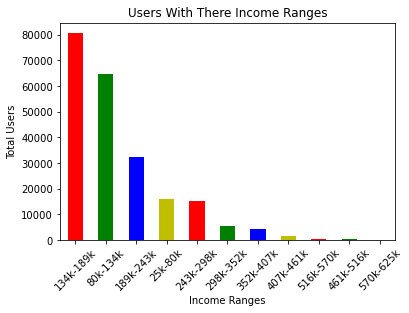

In [95]:
# LETS SEE HOW THE INCOME RANGES ARE FOR THE USERS WHO TAKE LOANS
col='AMT_INCOME_TOTAL' 

app_dataa[col].value_counts().plot.bar(color=['r','g','b','y'])
plt.title(f'Users With There Income Ranges')
plt.xticks(rotation=45)
plt.xlabel('Income Ranges')
plt.ylabel('Total Users')
plt.show()

# WE CAN SEE THE Majority of users group falls in range of 80k-298k where 134k-189k is majority.

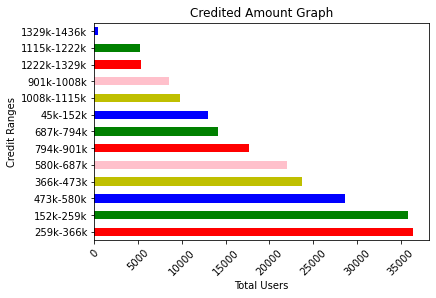

In [96]:
# LETS SEE HOW MUCH IS THE USER TAKES LOAN AS CREDIT USING AMT_CREDIT
col='AMT_CREDIT'
app_dataa[col].value_counts().plot.barh(color=['r','g','b','y','pink'])
plt.title(f'Credited Amount Graph')
plt.xticks(rotation=45)
plt.ylabel('Credit Ranges')
plt.xlabel('Total Users')
plt.show()

# WE CAN SEE THE Majority of users group falls in range of 152k-901k where 259k-366k is majority.

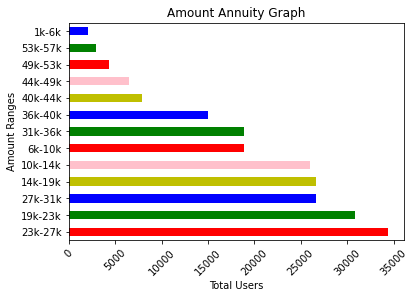

In [97]:
# LETS SEE HOW MUCH IS THE AMT_ANNUITY OF THE APPLIED USER
col='AMT_ANNUITY'
app_dataa[col].value_counts().plot.barh(color=['r','g','b','y','pink'])
plt.title(f'Amount Annuity Graph')
plt.xticks(rotation=45)
plt.ylabel('Amount Ranges')
plt.xlabel('Total Users')
plt.show()

# WE CAN SEE THAT AMOUNT IN BETWEEN 17K-27K FOR THE MAJORITY O

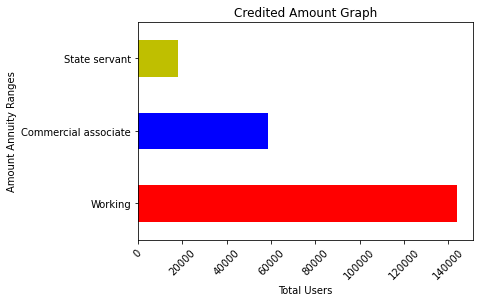

In [98]:
# LETS SEE THE USERS INCOME TYPE 
col='NAME_INCOME_TYPE' 
app_dataa[col].value_counts().plot.barh(color=['r','b','y'])
plt.title(f'Credited Amount Graph')
plt.xticks(rotation=45)
plt.ylabel('Amount Annuity Ranges')
plt.xlabel('Total Users')
plt.show()

# BASED ON THE PLOT WE CAN SAY THAT MAJORIY PEOPLE ARE FROM WORKING CATEGORY WHERE AT SECONDRY COMMERCIAL_ASSOCIATES

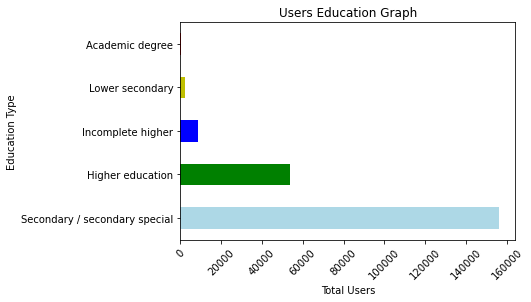

In [99]:
# LETS SEE HOW MANY USERS WHO APPLIES FOR LOAN ARE EDUCATED AND AT WHAT LEVEL
col='NAME_EDUCATION_TYPE' 
app_dataa[col].value_counts().plot.barh(color=['lightblue','g','b','y','r'])
plt.title(f'Users Education Graph')
plt.xticks(rotation=45)
plt.ylabel('Education Type')
plt.xlabel('Total Users')
plt.show()

# HERE THE MOST USERS FALLS IN SECONDARY EDUCTION WHERE AS HIGHER EDUCATION IS OF MORE USERS COMPARED 
# TO INCOMPLETE AND LOWER SECONDARY

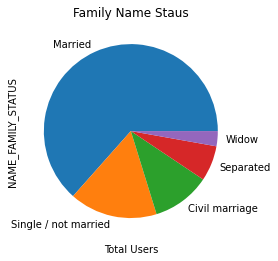

In [100]:
# LETS SEE INO WHAT CATEGORY THE USERS FALL IN FAMILY STATUS
col='NAME_FAMILY_STATUS' 
app_dataa[col].value_counts().plot.pie()
plt.title(f'Family Name Staus')
plt.xlabel('Total Users')
plt.show()

# FROM THE PIE CHART WE CAN CLEARLY SEE THAT MARRIED AND UN-MARRIED/SINGLE PEOPLE APPLIES FOR LOAN MOSTLY 

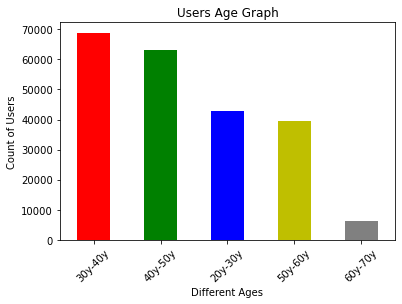

In [101]:
# LETS PLOT THE DAYS_BIRTH COLUMN TO FIND THE MAJORITY OF USERS FALLS IN WHICH AGE GROUP
col='DAYS_BIRTH'
app_dataa[col].value_counts().plot.bar(color=['r','g','b','y','grey'])
plt.title(f'Users Age Graph')
plt.xticks(rotation=45)
plt.ylabel('Count of Users')
plt.xlabel('Different Ages')
plt.show()

# THE USER'S WITH AGE GROUP 30Y-60Y ARE THE MOJORITY WHO APPLIES FOR LOAN

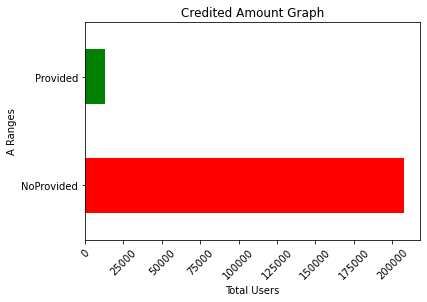

In [102]:
# LETS HAVE A PLOT FRO THE NO.OF.USER'S PROVIDE EMAIL
col='FLAG_EMAIL' 
data=app_dataa[col].apply(lambda x: 'Provided' if int(x)==1 else 'NoProvided').value_counts()
data.plot.barh(color=['r','g'])
plt.title(f'Credited Amount Graph')
plt.xticks(rotation=45)
plt.ylabel('A Ranges')
plt.xlabel('Total Users')
plt.show()

# WE CAN SEE MANY OF THE USERS ARE NOT PROVIDING THE EMAILS

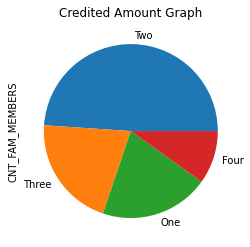

In [103]:
# LETS SEE THE MAJORITY COUNT OF FAMILY MEMBERS TO AN USERS
col='CNT_FAM_MEMBERS'
lst=['Zero','One','Two','Three','Four']
data=app_dataa[col].apply(lambda x: lst[x]).value_counts()
data.plot.pie()
plt.title(f'Credited Amount Graph')
plt.xticks(rotation=45)
plt.show()

# WE CAN SEE THAT MANY USERS AT MOSTLY WITH TWO AND THREE FAMILY MEMBERS. 

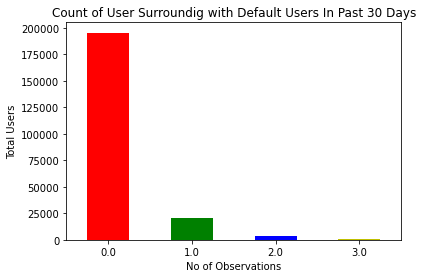

In [104]:
# LETS SEE HOW MANY USERS WITH DEFAULT OBSERVATION IN THEIR SURROUNDINGS IN PAST 30 DAYS
col='DEF_30_CNT_SOCIAL_CIRCLE' 
data=app_dataa[app_dataa[col]<4.0][col]
data.value_counts().plot.bar(color=['r','g','b','y'])
plt.title(f'Count of User Surroundig with Default Users In Past 30 Days')
plt.xticks(rotation=0)
plt.xlabel('No of Observations')
plt.ylabel('Total Users')
plt.show()

# WE CAN SEE THAT NO OF OBSERVATION IS MAJORLY ZERO WHERE SOME AMOUNT OF OBSERVATION WITH 1 ARE AVAILABLE

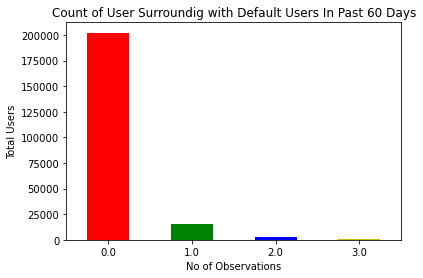

In [105]:
# LETS SEE HOW MANY USERS WITH DEFAULT OBSERVATION IN THEIR SURROUNDINGS IN PAST 60 DAYS
col='DEF_60_CNT_SOCIAL_CIRCLE'
data=app_dataa[app_dataa[col]<4.0][col]
data.value_counts().plot.bar(color=['r','g','b','y'])
plt.title(f'Count of User Surroundig with Default Users In Past 60 Days')
plt.xticks(rotation=0)
plt.xlabel('No of Observations')
plt.ylabel('Total Users')
plt.show()

# WE CAN SEE THAT NO OF OBSERVATION IS MAJORLY ZERO WHERE SOME AMOUNT OF OBSERVATION WITH 1 ARE AVAILABLE

### PREVIOUS_APPLICATION

In [106]:
prev_appa.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,0L-2L,0L-1L,XAP,Approved,0m-6m,...,Repeater,Mobile,POS,XNA,Country-wide,0h-1h,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,6L-8L,4L-6L,XNA,Approved,6m-12m,...,Repeater,XNA,Cash,x-sell,Contact center,NaN,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,0L-2L,0L-1L,XNA,Approved,12m-19m,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,NaN,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,4L-6L,3L-4L,XNA,Approved,25m-31m,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,NaN,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,2L-4L,3L-4L,Repairs,Refused,38m-44m,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,NaN,XNA,24.0,high,Cash Street: high


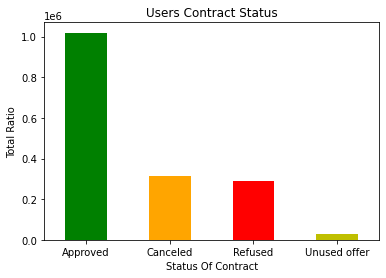

In [107]:
# LET CHECK THE USERS CONTRACT STATUS OF PREVIOUS LOANS
col='NAME_CONTRACT_STATUS'
prev_appa[col].value_counts().plot.bar(color=['g','orange','r','y'])
plt.title(f'Users Contract Status')
plt.xticks(rotation=0)
plt.xlabel('Status Of Contract')
plt.ylabel('Total Ratio')
plt.show()

# WECAN CLEARLY SEE THAT MAJORITY OF LOANS ARE APPROVED,FEW ARE MODERATELY CANCELLED AND REFUSED AND THE OTHER ONE IS UNUSED 
# WITH VERY LOW FREQUNCY

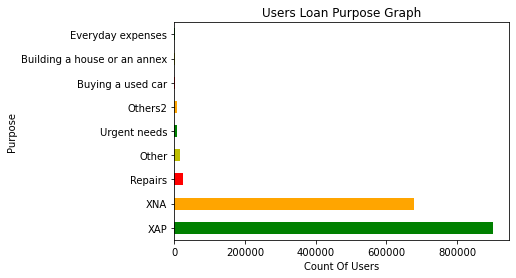

In [108]:
# LETS SEE INTO WHICH CATEGORY THE LOAN COMES MAJORLY WHEN IT COMES PURPOSE
col='NAME_CASH_LOAN_PURPOSE'
lst=['Journey','Education','Payments on other loans','Medicine']
data=prev_appa[~(prev_appa[col].isin(lst))][col].value_counts()
data.plot.barh(color=['g','orange','r','y'])
plt.title(f'Users Loan Purpose Graph')
plt.xticks(rotation=0)
plt.xlabel('Count Of Users')
plt.ylabel('Purpose')
plt.show()

# WE CAN SEE THAT THE MAJORITY PEOPLE FALLS UNDER XAP AND XNA.

<function matplotlib.pyplot.show(close=None, block=None)>

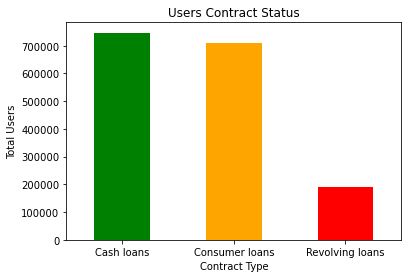

In [109]:
# LETS SEE THE CONTRACT TYPE IN WHICH THE MAJORIY OF THE USERS CHOOSES
col='NAME_CONTRACT_TYPE'
prev_appa[col].value_counts().plot.bar(color=['g','orange','r','y'])
plt.title(f'Users Contract Status')
plt.xticks(rotation=0)
plt.xlabel('Contract Type')
plt.ylabel('Total Users')
plt.show

# FROM THE PLOT WE CAN SAY THAT CASH AND CONSUMER LOANS ARE MOSTLY USERS CHOICE.

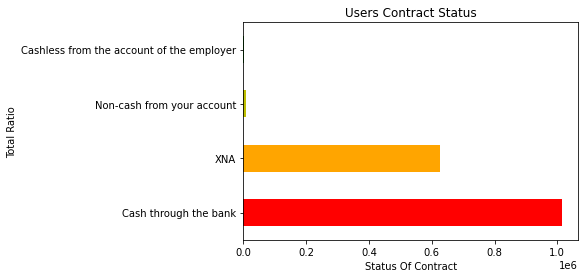

In [110]:
# PLOTING A GRAPTH TO CHECK THE USERS MOST USERS CHOICE WHEN IT COMES TO PAYMENT MODE
col='NAME_PAYMENT_TYPE'
prev_appa[col].value_counts().plot.barh(color=['r','orange','y','g'])
plt.title(f'Users Contract Status')
plt.xticks(rotation=0)
plt.xlabel('Status Of Contract')
plt.ylabel('Total Ratio')
plt.show()

# FROM THE PLOT WE CAN SAY THAT MOST USERS PREFER 'CASH THORUGH BANK' AND SOME USERS ALSO PREFERD XNA THMOST.

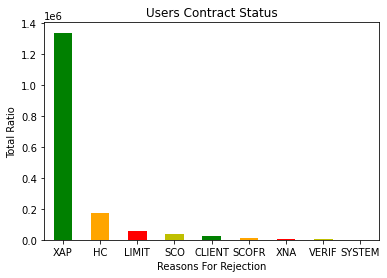

In [111]:
# LETS KNOW WHICH ONE OF THE REASON IS MOSTLY CAUSE OF REJECTION
col='CODE_REJECT_REASON'
prev_appa[col].value_counts().plot.bar(color=['g','orange','r','y'])
plt.title(f'Users Contract Status')
plt.xticks(rotation=0)
plt.xlabel('Reasons For Rejection')
plt.ylabel('Total Ratio')
plt.show()

# FROM WE CAN SAY XAP IS MAJORLY THE REASON FOR LAON GETTING REJECTED.

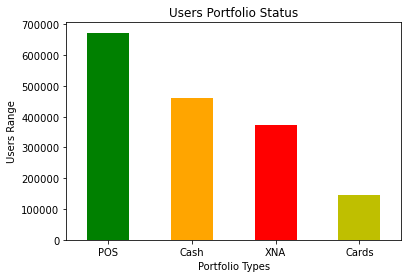

In [112]:
# WHICH ONE THE USER CHOOSES OUT AF DIFFERENT CHOICE OF PORTFOLIO'S
col='NAME_PORTFOLIO'
prev_appa[col].value_counts().plot.bar(color=['g','orange','r','y'])
plt.title(f'Users Portfolio Status')
plt.xticks(rotation=0)
plt.xlabel('Portfolio Types')
plt.ylabel('Users Range')
plt.show()

# The 'POS' AND 'CASH' IS THE ONE WHICH USERS CHOOSES MAJORLY WHERE 'CARDS' ARE OF VERY LOW PRIORITY 

## b) Bivariate Analysis (Segmented Analysis, as this analysis is mostly comparative based.)
### APPLCATION_DATA
#### As Target is the one which is the output type for this loans data we majorly compare with TARGET column.

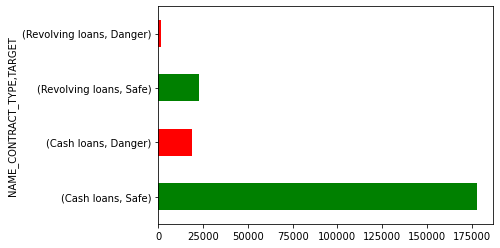

In [113]:

app_dataa.groupby(by='NAME_CONTRACT_TYPE')['TARGET'].value_counts().plot.barh(color=['g','r'])
plt.show()

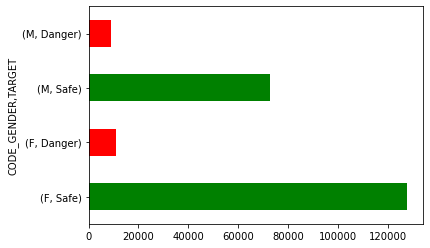

In [114]:
# TARGET CODE_GENDER  
app_dataa.groupby(by='CODE_GENDER')['TARGET'].value_counts().plot.barh(color=['g','r'])
plt.show()

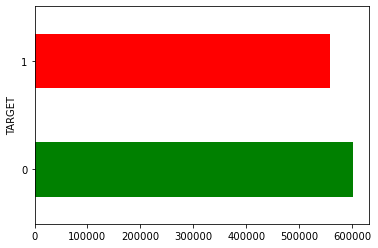

In [115]:
# AMT_CREDIT 
app_datac.groupby(by='TARGET')['AMT_CREDIT'].mean().plot.barh(color=['g','r'])
plt.show()

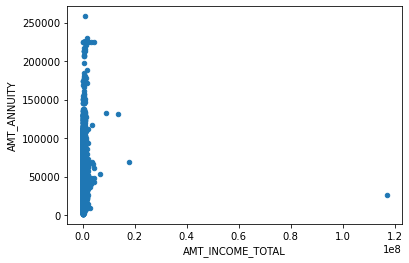

In [116]:
app_datac.plot.scatter(x='AMT_INCOME_TOTAL',y='AMT_ANNUITY')
plt.show()

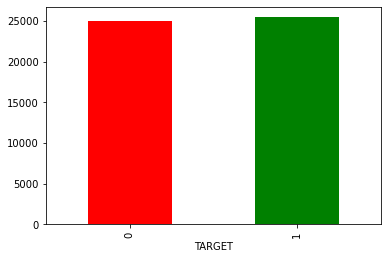

In [117]:
app_datad.groupby(by='TARGET')['AMT_ANNUITY'].mean().plot.bar(color=['r','g'])
plt.show()

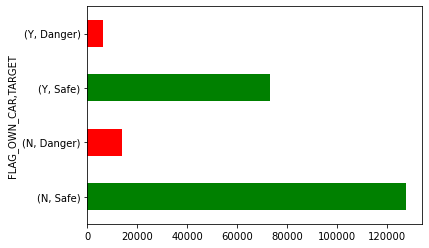

In [118]:
# TARGET FLAG_OWN_CAR  
app_dataa.groupby(by='FLAG_OWN_CAR')['TARGET'].value_counts().plot.barh(color=['g','r'])
plt.show()

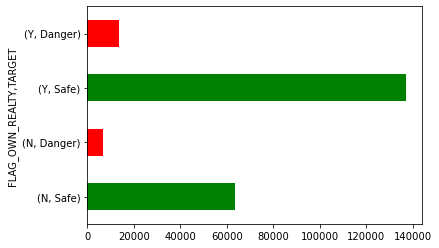

In [119]:
# TARGET FLAG_OWN_REALTY  
app_dataa.groupby(by='FLAG_OWN_REALTY')['TARGET'].value_counts().plot.barh(color=['g','r'])
plt.show()

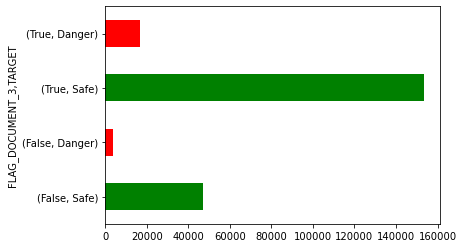

In [120]:
# FLAG_DOCUMENT_3 TARGET
app_dataa.groupby(by='FLAG_DOCUMENT_3')['TARGET'].value_counts().plot.barh(color=['g','r'])
plt.show()

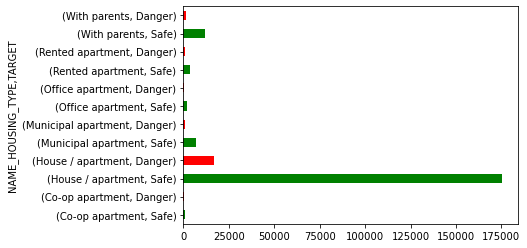

In [121]:
# TARGET NAME_HOUSING_TYPE  
app_dataa.groupby(by='NAME_HOUSING_TYPE')['TARGET'].value_counts().plot.barh(color=['g','r'])
plt.show()

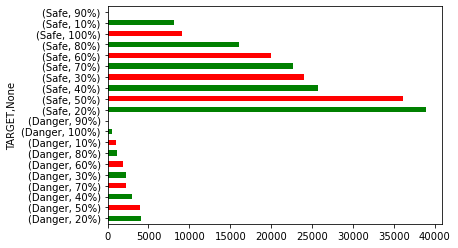

In [122]:
# REGION_POPULATION_RELATIVE  TARGET
app_dataa.groupby(by='TARGET')['REGION_POPULATION_RELATIVE'].value_counts().plot.barh(color=['g','r'])
plt.show()

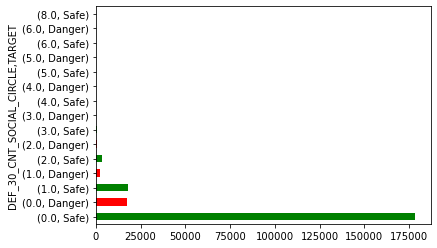

In [123]:
# DEF_30_CNT_SOCIAL_CIRCLE 
app_dataa.groupby(by='DEF_30_CNT_SOCIAL_CIRCLE')['TARGET'].value_counts().plot.barh(color=['g','r'])
plt.show()

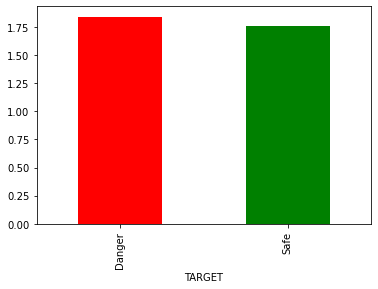

In [124]:
# AMT_REQ_CREDIT_BUREAU_YEAR
app_dataa.groupby(by='TARGET')['AMT_REQ_CREDIT_BUREAU_YEAR'].mean().plot.bar(color=['r','g'])
plt.show()

### PREVIOUS_APPLICATION
#### As NAME_CONTRACT_STATUS is the one which is the output type for this loans data we majorly compare with NAME_CONTRACT_STATUS column.

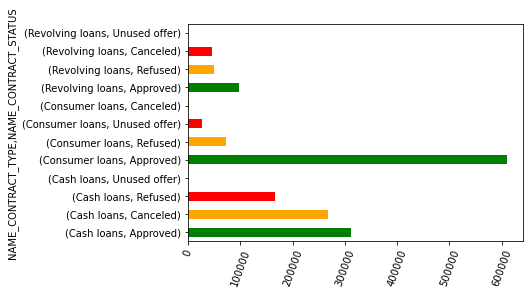

In [125]:
# NAME_CONTRACT_TYPE 
prev_appa.groupby(by='NAME_CONTRACT_TYPE')['NAME_CONTRACT_STATUS'].value_counts().plot.barh(color=['g','orange','r','y'])
plt.xticks(rotation=70)
plt.show()

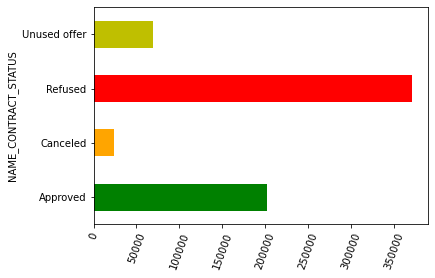

In [126]:
# AMT_CREDIT 
prev_appc.groupby(by='NAME_CONTRACT_STATUS')['AMT_CREDIT'].mean().plot.barh(color=['g','orange','r','y'])
plt.xticks(rotation=70)
plt.show()

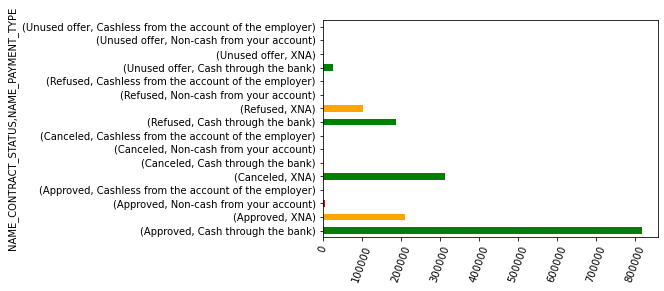

In [127]:
# NAME_PAYMENT_TYPE 
prev_appc.groupby(by='NAME_CONTRACT_STATUS')['NAME_PAYMENT_TYPE'].value_counts().plot.barh(color=['g','orange','r','y'])
plt.xticks(rotation=70)
plt.show()

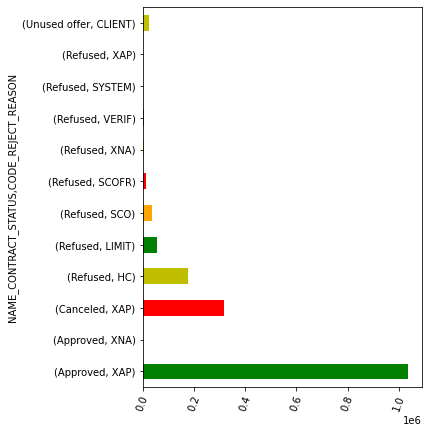

In [128]:
# CODE_REJECT_REASON 
prev_appc.groupby(by='NAME_CONTRACT_STATUS')['CODE_REJECT_REASON'].value_counts().plot.barh(color=['g','orange','r','y'],figsize=(5,7))
plt.xticks(rotation=70)
plt.show()

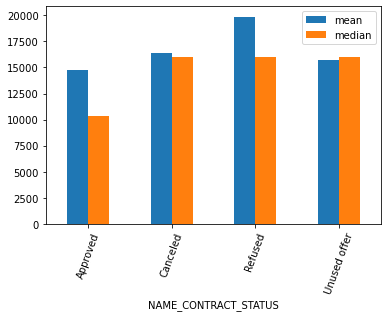

In [129]:
prev_appc.groupby(by='NAME_CONTRACT_STATUS')['AMT_ANNUITY'].aggregate(['mean','median']).plot.bar()
plt.xticks(rotation=70)
plt.show()

## c) Multivariate Analysis


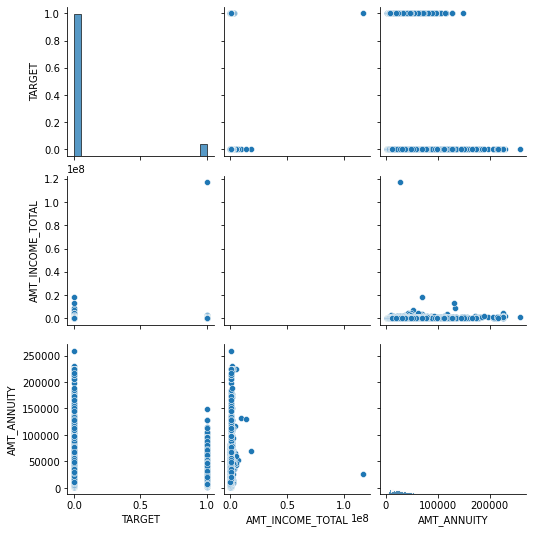

In [130]:
# FROM APPLICATION_DATA
sns.pairplot(app_datac,vars=['TARGET','AMT_INCOME_TOTAL', 'AMT_ANNUITY'])
plt.show()

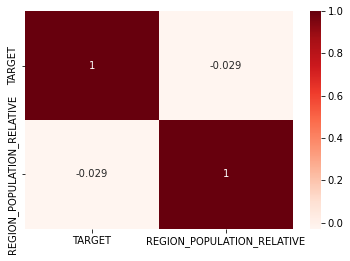

In [131]:
sns.heatmap(app_datad[['TARGET','REGION_POPULATION_RELATIVE']].corr(),annot=True,cmap='Reds')
plt.show()

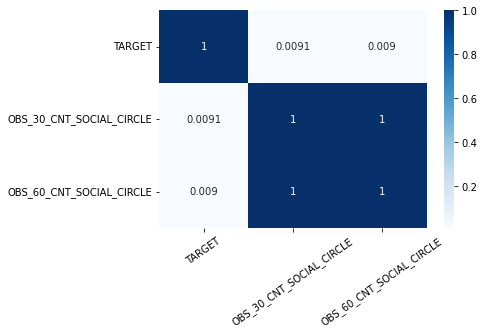

In [132]:
sns.heatmap(app_data[['TARGET','OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE']].corr(),annot=True,cmap='Blues')
plt.xticks(rotation=35)
plt.show()

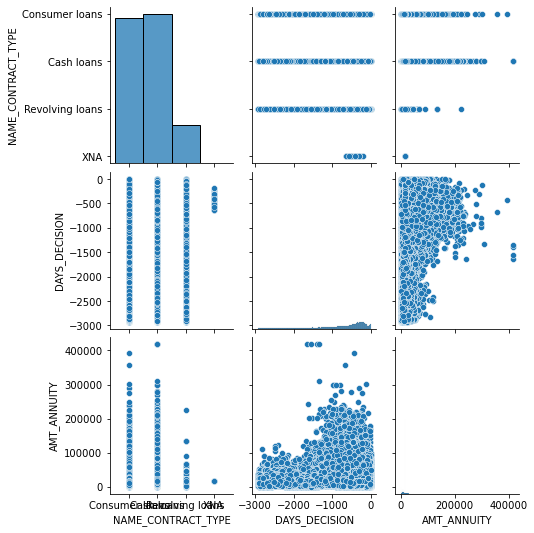

In [133]:
#FROM PREVIOUS_APPLICATION
sns.pairplot(prev_appc,vars=['NAME_CONTRACT_TYPE','DAYS_DECISION', 'AMT_ANNUITY'])
plt.show()

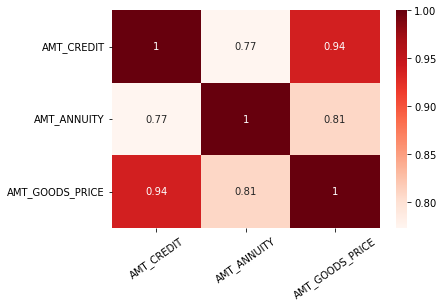

In [134]:
sns.heatmap(prev_appc[['AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']].corr(),annot=True,cmap='Reds')
plt.xticks(rotation=35)
plt.show()

In [145]:
#Merge
app_prev=prev_appa.merge(app_dataa,left_on='SK_ID_PREV',right_on='SK_ID_CURR', how='right')
app_prev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220859 entries, 0 to 220858
Data columns (total 68 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_PREV                   0 non-null       float64 
 1   SK_ID_CURR_x                 0 non-null       float64 
 2   NAME_CONTRACT_TYPE_x         0 non-null       object  
 3   AMT_ANNUITY_x                0 non-null       float64 
 4   AMT_APPLICATION              0 non-null       float64 
 5   AMT_CREDIT_x                 0 non-null       category
 6   AMT_GOODS_PRICE_x            0 non-null       category
 7   NAME_CASH_LOAN_PURPOSE       0 non-null       object  
 8   NAME_CONTRACT_STATUS         0 non-null       object  
 9   DAYS_DECISION                0 non-null       category
 10  NAME_PAYMENT_TYPE            0 non-null       object  
 11  CODE_REJECT_REASON           0 non-null       object  
 12  NAME_CLIENT_TYPE             0 non-null     

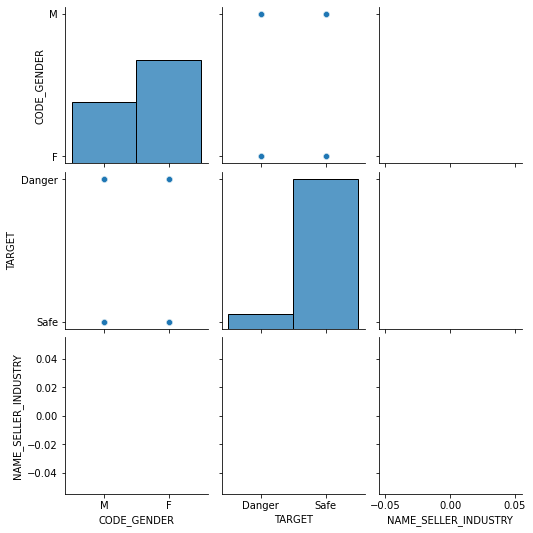

In [146]:
sns.pairplot(app_prev,vars=['CODE_GENDER','TARGET', 'NAME_SELLER_INDUSTRY'],)
plt.xticks(rotation=35)
plt.show()

# D) Conclusion:
### The Majority of users falls under re-payers and few of them are defaulters.
### Users Mostly Prefer Cash Loans than Revolving loan as we can say that the revolving loan will have high interest rates.
### The Female users are mostly taking the loans than male.
### Default users are more in cash flow name_contract_type
### Out of all loan applications 55% of loans are getting refused which is to be considered for banks user experience.
### Applicants with more than 7Lks are very less likely to default.
### The most people who apply for loans are either married or single.
### The people of age 20-40 are chances of defaulting.

